<font size="5"> __MANU465 Team 5 - Music Preference Prediction Using Electroencephalogram (EEG) and Machine Learning Algorithm__ </font>

<font size="3"> __Team Members__ </font>

|         Name        | Student ID |
|:-------------------:|:----------:|
|Pang Tsz Tuen (Angel)|  79331609  |
|     Remy Zhang      |  80497662  |
|    Dhanush Kumar    |  41850751  |
|  Milena Markovich   |  62831458  |
|     Grace Quan      |  15512486  |
|    Pablo Palero     |  84274448  |

<img src="EEG.JPG" alt="Drawing" style="width: 400px;"/>

# Project Description
In this project, the goal of this project is to build machine learning models to predict music preference (binary classfication: like or dislike) using a electroencephalograms (EEG) device. ANN, CNN, non-linear SVM and NB models are used.
 
## Overview
### Motivation
Through the advancement of technology, we now have unprecedented access to a diverse array of music libraries, genres and compositions. Thanks to the increased portability of music players, millions of people across the world turn to music in order to energize, soothe or comfort themselves throughout their day-to-day lives. The development of electroencephalograms (EEG) has enabled the possibility of investigating the electrical signals in the human brain inexpensively and efficiently. EEG is used for a wide range of purposes and event-related-potentials (ERP) is one of the topics where lots of researchers are interested in. With the potential to apply in music therapy and neuro-marketing, EEG based emotion classification during music listening is a rapidly-growing research field. This research project is propelled by the interest in how our brain waves change as we listen to and process our music preferences. 

### Goals and Objective
The objective of this project is to use machine learning models to predict whether or not a person is listening to a good or bad song, based on brainwave data.

This project focuses on examining the ERP related to music preference. Using a MUSE 2 EEG headband, a series of real-time brainwave data is collected from all group members, as well as external participants. The 100 collected data (48 data for good songs and 52 data for bad songs) was used to train, via different methods mentioned in the MANU 465 lectures, a model which will be able to classify whether someone is listening to a song that he/she likes or dislikes, based on their EEG data. Our goal in this research project is to identify the change in brain signals corresponding to changing moods. In order to accomplish this goal, we will develop machine learning models and use the MUSE headband to determine the song preference.

The following tasks will be performed:

1. Import the dataset
2. Data preprocessing: Take care of unreasonable data
3. Data preprocessing: Format the data to feed into the EEG feature extraction program
4. Data preprocessing: EEG feature extraction
5. PCA
6. Images creation and feature generation for CNN
7. Data visualization
8. Build the ANN, CNN, SVM and NB models
9. Train the models
10. Make a prediction
11. Evaluate the model accuracy
12. Visualizing the results
13. Transfer learning code (VGG16) for future work

# General Setup

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sb
import os

## Random State Setting

In [2]:
RandSt = 42

# Importing Raw Data

In [3]:
# Get current working directory and append the data
cwd = os.getcwd()
goodDir = cwd + r"\Data\Raw\Good"
badDir = cwd + r"\Data\Raw\Bad"

filesBad = []
filesGood = []

for file in os.listdir(goodDir):
    if file.endswith('.csv'):
        filesGood.append(os.path.join(goodDir, file))
for file in os.listdir(badDir):
        if file.endswith('.csv'):
            filesBad.append(os.path.join(badDir, file))

In [4]:
print(str(len(filesGood)) + " files were added from the Good Song category")
print(str(len(filesBad)) + " files were added from the Bad Song category")

48 files were added from the Good Song category
52 files were added from the Bad Song category


## Showing a Raw Data in a Table

In [5]:
num = 21
sample = pd.read_csv(filesGood[num])
pd.DataFrame(sample)

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2022-11-13 16:47:33.061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/event/connected Muse-B25E
1,2022-11-13 16:47:34.062,0.738149,-0.489828,0.343414,0.101499,0.870496,-0.337052,0.271108,0.314614,0.722172,...,4.777679,-7.140350,-7.768402,1.0,1.0,1.0,1.0,1.0,80.0,NaN
2,2022-11-13 16:47:35.062,0.738149,-0.223042,0.343414,0.353285,0.870496,-0.472314,0.271108,0.465935,0.722172,...,4.164581,-5.383301,-1.345825,1.0,1.0,1.0,1.0,1.0,80.0,NaN
3,2022-11-13 16:47:36.062,0.738149,-0.295240,0.343414,0.034902,0.870496,-0.579167,0.271108,0.460207,0.722172,...,4.710388,-4.231873,-1.921539,1.0,1.0,1.0,1.0,1.0,80.0,NaN
4,2022-11-13 16:47:37.062,0.738149,0.277394,0.343414,0.417833,0.870496,0.203312,0.271108,0.411594,0.722172,...,5.024414,-4.822540,-2.160797,1.0,1.0,1.0,1.0,1.0,75.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2022-11-13 16:50:41.198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
200,2022-11-13 16:50:42.072,0.565872,0.302083,0.343414,0.835584,0.391075,-0.028142,0.271108,1.038765,0.785706,...,4.800110,-5.211334,-2.340240,1.0,1.0,1.0,2.0,1.0,70.0,NaN
201,2022-11-13 16:50:43.064,0.563617,-0.360166,0.343414,0.598181,0.465498,-0.233747,0.271108,0.820542,0.692372,...,4.859924,-4.508514,-1.637421,1.0,1.0,1.0,2.0,1.0,70.0,NaN
202,2022-11-13 16:50:44.064,0.570562,-0.122538,0.343414,0.214819,0.510002,-0.140221,0.271108,0.568532,0.644930,...,4.979553,-4.755249,-2.011261,1.0,1.0,1.0,2.0,1.0,70.0,NaN


## Quick Review of the Data

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TimeStamp        204 non-null    object 
 1   Delta_TP9        192 non-null    float64
 2   Delta_AF7        192 non-null    float64
 3   Delta_AF8        192 non-null    float64
 4   Delta_TP10       192 non-null    float64
 5   Theta_TP9        192 non-null    float64
 6   Theta_AF7        192 non-null    float64
 7   Theta_AF8        192 non-null    float64
 8   Theta_TP10       192 non-null    float64
 9   Alpha_TP9        192 non-null    float64
 10  Alpha_AF7        192 non-null    float64
 11  Alpha_AF8        192 non-null    float64
 12  Alpha_TP10       192 non-null    float64
 13  Beta_TP9         192 non-null    float64
 14  Beta_AF7         192 non-null    float64
 15  Beta_AF8         192 non-null    float64
 16  Beta_TP10        192 non-null    float64
 17  Gamma_TP9       

# Data Preprocessing

Note: Initial preprocessing here was done to customize the data before feeding into to 'EEG_feature_extraction', which is an open-source EEG feature extraction script that uses sliding window approach to create a static dataset. (Available: https://github.com/jordan-bird/eeg-feature-generation)

Reference: Classification of EEG Signals Based on Image Representation of Statistical Features (Available: https://www.researchgate.net/publication/335503005_Classification_of_EEG_Signals_Based_on_Image_Representation_of_Statistical_Features)

## Creating the Preprocessed Dataset from Raw Data

In [7]:
# Extract row 0 (TimeStamp) and rows 21-25 (micro-voltage measured, i.e. Raw brainwaves) from all files
# these are the only 5 features relevant for use in the EEG_feature_extraction function

rowsBad = []
for f in filesBad:
    for r in range(pd.read_csv(f).shape[0]):
        rowsBad.append(pd.read_csv(f).iloc[r,[0,21,22,23,24,25]])

rowsGood = []
for f in filesGood:
    for r in range(pd.read_csv(f).shape[0]):
        rowsGood.append(pd.read_csv(f).iloc[r,[0,21,22,23,24,25]])

In [8]:
data_Good = pd.DataFrame(rowsGood)
data_Good

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2022-10-25 11:40:31.544,NaN,NaN,NaN,NaN,NaN
1,2022-10-25 11:40:31.586,NaN,NaN,NaN,NaN,NaN
2,2022-10-25 11:40:32.545,821.978022,805.054945,794.981685,806.666667,796.996337
3,2022-10-25 11:40:33.128,NaN,NaN,NaN,NaN,NaN
4,2022-10-25 11:40:33.544,654.761905,724.468864,498.424908,661.611722,657.985348
...,...,...,...,...,...,...
142,2022-11-28 12:36:46.542,795.787546,803.443223,787.728938,789.340659,778.461538
143,2022-11-28 12:36:47.539,811.098901,794.578755,814.725275,818.754579,710.366300
144,2022-11-28 12:36:48.532,680.952381,794.981685,916.263736,687.399267,840.512821
145,2022-11-28 12:36:48.742,NaN,NaN,NaN,NaN,NaN


In [9]:
data_Bad = pd.DataFrame(rowsBad)
data_Bad

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2022-10-25 11:43:27.675,NaN,NaN,NaN,NaN,NaN
1,2022-10-25 11:43:27.738,NaN,NaN,NaN,NaN,NaN
2,2022-10-25 11:43:28.676,787.326007,838.901099,788.937729,797.399267,722.454212
3,2022-10-25 11:43:29.234,NaN,NaN,NaN,NaN,NaN
4,2022-10-25 11:43:29.676,814.725275,792.967033,787.326007,804.249084,739.377289
...,...,...,...,...,...,...
133,2022-12-02 12:10:13.959,823.186813,818.351648,746.630037,809.890110,689.010989
134,2022-12-02 12:10:14.655,NaN,NaN,NaN,NaN,NaN
135,2022-12-02 12:10:14.960,789.743590,796.996337,795.787546,788.937729,646.703297
136,2022-12-02 12:10:15.960,789.743590,801.428571,793.369963,800.219780,680.549451


## Remove Empty Rows

Remove NaN values associated with blinking and jaw clenching. There are >30% of NaN in some data collected, therefore it is more reasonable to remove them instead of imputing them with mean value.

In [10]:
data_Bad = data_Bad.dropna()
data_Bad

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
2,2022-10-25 11:43:28.676,787.326007,838.901099,788.937729,797.399267,722.454212
4,2022-10-25 11:43:29.676,814.725275,792.967033,787.326007,804.249084,739.377289
5,2022-10-25 11:43:30.683,818.351648,792.161172,792.564103,831.245421,698.681319
6,2022-10-25 11:43:31.676,793.369963,780.073260,792.564103,809.487179,673.296703
8,2022-10-25 11:43:32.676,798.608059,780.073260,792.967033,808.278388,821.575092
...,...,...,...,...,...,...
131,2022-12-02 12:10:12.960,781.282051,801.025641,781.684982,784.505495,629.377289
133,2022-12-02 12:10:13.959,823.186813,818.351648,746.630037,809.890110,689.010989
135,2022-12-02 12:10:14.960,789.743590,796.996337,795.787546,788.937729,646.703297
136,2022-12-02 12:10:15.960,789.743590,801.428571,793.369963,800.219780,680.549451


In [11]:
data_Good = data_Good.dropna()
data_Good

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
2,2022-10-25 11:40:32.545,821.978022,805.054945,794.981685,806.666667,796.996337
4,2022-10-25 11:40:33.544,654.761905,724.468864,498.424908,661.611722,657.985348
5,2022-10-25 11:40:34.545,812.710623,804.652015,738.571429,803.443223,793.369963
6,2022-10-25 11:40:35.549,562.490842,845.750916,819.157509,548.791209,749.853480
8,2022-10-25 11:40:36.556,814.725275,853.406593,774.029304,784.505495,714.798535
...,...,...,...,...,...,...
141,2022-11-28 12:36:45.542,795.384615,790.146520,780.073260,804.652015,861.868132
142,2022-11-28 12:36:46.542,795.787546,803.443223,787.728938,789.340659,778.461538
143,2022-11-28 12:36:47.539,811.098901,794.578755,814.725275,818.754579,710.366300
144,2022-11-28 12:36:48.532,680.952381,794.981685,916.263736,687.399267,840.512821


## Convert Datetime Column to Timestamps

In [12]:
from datetime import datetime

ind = 0
for time in data_Bad.iloc[:, 0]:
    timeStamp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_Bad.iat[ind, 0] = (timeStamp)
    ind = ind+1
    
ind = 0
for time in data_Good.iloc[:, 0]:
    timeStamp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_Good.iat[ind, 0] = (timeStamp)
    ind = ind+1

In [13]:
data_Good.head()

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
2,1666723232.545,821.978022,805.054945,794.981685,806.666667,796.996337
4,1666723233.544,654.761905,724.468864,498.424908,661.611722,657.985348
5,1666723234.545,812.710623,804.652015,738.571429,803.443223,793.369963
6,1666723235.549,562.490842,845.750916,819.157509,548.791209,749.853480
8,1666723236.556,814.725275,853.406593,774.029304,784.505495,714.798535


## Take Care of Unreasonable Data
There are some zero measurements in the data. However, it is unreasonable for the micro-volt measurement to be zero. It is believed that these 0 input may be due to poor connection in one of the sensors, therefore mean values are used to replace the entries with 0 input.

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = 0, strategy = 'mean')
data_Good_im = imputer.fit_transform(data_Good)
data_Bad_im = imputer.fit_transform(data_Bad)

In [15]:
data_Good_im_df = pd.DataFrame(data_Good_im, columns = data_Good.columns)
data_Bad_im_df = pd.DataFrame(data_Bad_im, columns = data_Good.columns)

In [16]:
print("Good Song Data size is: \t", data_Good_im_df.shape, "\nBad Song Data size is: \t\t", data_Bad_im_df.shape)

Good Song Data size is: 	 (8571, 6) 
Bad Song Data size is: 		 (8539, 6)


In [17]:
pd.DataFrame(data_Bad_im_df)

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,1.666723e+09,787.326007,838.901099,788.937729,797.399267,722.454212
1,1.666723e+09,814.725275,792.967033,787.326007,804.249084,739.377289
2,1.666723e+09,818.351648,792.161172,792.564103,831.245421,698.681319
3,1.666723e+09,793.369963,780.073260,792.564103,809.487179,673.296703
4,1.666723e+09,798.608059,780.073260,792.967033,808.278388,821.575092
...,...,...,...,...,...,...
8534,1.670012e+09,781.282051,801.025641,781.684982,784.505495,629.377289
8535,1.670012e+09,823.186813,818.351648,746.630037,809.890110,689.010989
8536,1.670012e+09,789.743590,796.996337,795.787546,788.937729,646.703297
8537,1.670012e+09,789.743590,801.428571,793.369963,800.219780,680.549451


## Save Data to File

In [18]:
savelocBad = cwd + r"\Data\Preprocessed\Bad.csv"
savelocGood = cwd + r"\Data\Preprocessed\Good.csv"

if os.path.exists(savelocBad):
    os.remove(savelocBad)
    
if os.path.exists(savelocGood):
    os.remove(savelocGood)

pd.DataFrame(data_Good_im_df).to_csv(savelocBad, mode = 'w', index = False)
pd.DataFrame(data_Bad_im_df).to_csv(savelocGood, mode = 'w', index = False)

## EEG Feature Generation

In [19]:
from eegFG import EEG_feature_extraction as FE

# This combination of number of samples and period gives the most images
numSamp = 50
Period1 = 11

xBad, yBad = FE.generate_feature_vectors_from_samples(file_path = savelocBad,
                                         nsamples = numSamp, 
                                         period = Period1,
                                         slide_percent = 0.02, #0.02
                                         remove_redundant = False, 
                                         cols_to_ignore = None)
xBad.shape

(504, 810)

In [20]:
numSamp = 50
Period1 = 9

xGood, yGood = FE.generate_feature_vectors_from_samples(file_path = savelocGood,
                                         nsamples = numSamp, 
                                         period = Period1,
                                         slide_percent = 0.03, #0.03
                                         remove_redundant = False, 
                                         cols_to_ignore = None)
xGood.shape

(474, 810)

In [21]:
# Showing the extracted features
X_Good = pd.DataFrame(np.real(xGood))
X_Good.columns = np.hstack((['TimeStamp'], yGood))
X_Good.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_156_4,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,...,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02
mean,801.282833,794.625697,810.998929,803.388442,767.983837,0.683838,-0.928368,-1.897005,0.166111,0.792197,...,1.222537e-16,1.097745e-16,1.025163e-16,1.100625e-16,1.131572e-16,1.245777e-16,1.196534e-16,1.191791e-16,1.094658e-16,1.161076e-16
std,11.953104,7.233410,20.378416,10.533832,38.977296,24.150649,14.561367,35.659535,23.766457,57.942948,...,7.684314e-17,7.031014e-17,5.607273e-17,6.071550e-17,7.328178e-17,6.577306e-17,7.372554e-17,6.712160e-17,6.653424e-17,6.902691e-17
min,778.237688,741.973952,736.780627,780.655271,706.963777,-59.842251,-125.951331,-141.501464,-54.608008,-130.674590,...,1.127883e-17,1.306679e-17,6.611199e-18,1.391362e-17,6.202938e-18,1.956008e-17,4.440892e-18,4.440892e-18,0.000000e+00,8.881784e-18
25%,793.929589,791.131461,793.605006,796.145706,738.213268,-14.552504,-5.226867,-10.611022,-17.117696,-33.389883,...,6.192969e-17,6.321219e-17,6.193840e-17,6.792813e-17,6.341098e-17,7.226292e-17,7.021667e-17,7.105427e-17,5.824134e-17,7.105427e-17
50%,800.085470,795.384615,812.039072,804.965405,755.002035,-0.022095,1.128628,-0.636682,2.455986,-0.859855,...,1.067958e-16,9.172935e-17,9.458214e-17,1.027429e-16,9.667726e-17,1.126442e-16,1.039586e-16,1.128736e-16,9.860381e-17,1.074109e-16
75%,810.561661,798.384208,821.037851,811.188441,806.946479,13.263587,5.596329,7.852877,13.988239,39.303798,...,1.730295e-16,1.438496e-16,1.325894e-16,1.397497e-16,1.475216e-16,1.632622e-16,1.588822e-16,1.588822e-16,1.476221e-16,1.445850e-16
max,825.738706,806.980057,854.794465,826.231176,846.198616,68.051837,20.954453,121.102827,52.424571,188.646735,...,3.641883e-16,4.147722e-16,3.034559e-16,3.112741e-16,3.900131e-16,3.222436e-16,4.212064e-16,3.035440e-16,3.503523e-16,3.431864e-16


In [22]:
pd.set_option('display.max_columns', None)
pd.DataFrame(X_Good).head()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_d_h2h1_4,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q1_3,lag1_mean_q1_4,lag1_mean_q2_0,lag1_mean_q2_1,lag1_mean_q2_2,lag1_mean_q2_3,lag1_mean_q2_4,lag1_mean_q3_0,lag1_mean_q3_1,lag1_mean_q3_2,lag1_mean_q3_3,lag1_mean_q3_4,lag1_mean_q4_0,lag1_mean_q4_1,lag1_mean_q4_2,lag1_mean_q4_3,lag1_mean_q4_4,lag1_mean_d_q1q2_0,lag1_mean_d_q1q2_1,lag1_mean_d_q1q2_2,lag1_mean_d_q1q2_3,lag1_mean_d_q1q2_4,lag1_mean_d_q1q3_0,lag1_mean_d_q1q3_1,lag1_mean_d_q1q3_2,lag1_mean_d_q1q3_3,lag1_mean_d_q1q3_4,lag1_mean_d_q1q4_0,lag1_mean_d_q1q4_1,lag1_mean_d_q1q4_2,lag1_mean_d_q1q4_3,lag1_mean_d_q1q4_4,lag1_mean_d_q2q3_0,lag1_mean_d_q2q3_1,lag1_mean_d_q2q3_2,lag1_mean_d_q2q3_3,lag1_mean_d_q2q3_4,lag1_mean_d_q2q4_0,lag1_mean_d_q2q4_1,lag1_mean_d_q2q4_2,lag1_mean_d_q2q4_3,lag1_mean_d_q2q4_4,lag1_mean_d_q3q4_0,lag1_mean_d_q3q4_1,lag1_mean_d_q3q4_2,lag1_mean_d_q3q4_3,lag1_mean_d_q3q4_4,lag1_std_0,lag1_std_1,lag1_std_2,lag1_std_3,lag1_std_4,lag1_std_d_h2h1_0,lag1_std_d_h2h1_1,lag1_std_d_h2h1_2,lag1_std_d_h2h1_3,lag1_std_d_h2h1_4,lag1_skew_0,lag1_skew_1,lag1_skew_2,lag1_skew_3,lag1_skew_4,lag1_kurt_0,lag1_kurt_1,lag1_kurt_2,lag1_kurt_3,lag1_kurt_4,lag1_max_0,lag1_max_1,lag1_max_2,lag1_max_3,lag1_max_4,lag1_max_d_h2h1_0,lag1_max_d_h2h1_1,lag1_max_d_h2h1_2,lag1_max_d_h2h1_3,lag1_max_d_h2h1_4,lag1_max_q1_0,lag1_max_q1_1,lag1_max_q1_2,lag1_max_q1_3,lag1_max_q1_4,lag1_max_q2_0,lag1_max_q2_1,lag1_max_q2_2,lag1_max_q2_3,lag1_max_q2_4,lag1_max_q3_0,lag1_max_q3_1,lag1_max_q3_2,lag1_max_q3_3,lag1_max_q3_4,lag1_max_q4_0,lag1_max_q4_1,lag1_max_q4_2,lag1_max_q4_3,lag1_max_q4_4,lag1_max_d_q1q2_0,lag1_max_d_q1q2_1,lag1_max_d_q1q2_2,lag1_max_d_q1q2_3,lag1_max_d_q1q2_4,lag1_max_d_q1q3_0,lag1_max_d_q1q3_1,lag1_max_d_q1q3_2,lag1_max_d_q1q3_3,lag1_max_d_q1q3_4,lag1_max_d_q1q4_0,lag1_max_d_q1q4_1,lag1_max_d_q1q4_2,lag1_max_d_q1q4_3,lag1_max_d_q1q4_4,lag1_max_d_q2q3_0,lag1_max_d_q2q3_1,lag1_max_d_q2q3_2,lag1_max_d_q2q3_3,lag1_max_d_q2q3_4,lag1_max_d_q2q4_0,lag1_max_d_q2q4_1,lag1_max_d_q2q4_2,lag1_max_d_q2q4_3,lag1_max_d_q2q4_4,lag1_max_d_q3q4_0,lag1_max_d_q3q4_1,lag1_max_d_q3q4_2,lag1_max_d_q3q4_3,lag1_max_d_q3q4_4,lag1_min_0,lag1_min_1,lag1_min_2,lag1_min_3,lag1_min_4,lag1_min_d_h2h1_0,lag1_min_d_h2h1_1,lag1_min_d_h2h1_2,lag1_min_d_h2h1_3,lag1_min_d_h2h1_4,lag1_min_q1_0,lag1_min_q1_1,lag1_min_q1_2,lag1_min_q1_3,lag1_min_q1_4,lag1_min_q2_0,lag1_min_q2_1,lag1_min_q2_2,lag1_min_q2_3,lag1_min_q2_4,lag1_min_q3_0,lag1_min_q3_1,lag1_min_q3_2,lag1_min_q3_3,lag1_min_q3_4,lag1_min_q4_0,lag1_min_q4_1,lag1_min_q4_2,lag1_min_q4_3,lag1_min_q4_4,lag1_min_d_q1q2_0,lag1_min_d_q1q2_1,lag1_min_d_q1q2_2,lag1_min_d_q1q2_3,lag1_min_d_q1q2_4,lag1_min_d_q1q3_0,lag1_min_d_q1q3_1,lag1_min_d_q1q3_2,lag1_min_d_q1q3_3,lag1_min_d_q1q3_4,lag1_min_d_q1q4_0,lag1_min_d_q1q4_1,lag1_min_d_q1q4_2,lag1_min_d_q1q4_3,lag1_min_d_q1q4_4,lag1_min_d_q2q3_0,lag1_min_d_q2q3_1,lag1_min_d_q2q3_2,lag1_min_d_q2q3_3,lag1_min_d_q2q3_4,lag1_min_d_q2q4_0,lag1_min_d_q2q4_1,lag1_min_d_q2q4_2,lag1_min_d_q2q4_3,lag1_min_d_q2q4_4,lag1_min_d_q3q4_0,lag1_min_d_q3q4_1,lag1_min_d_q3q4_2,lag1_min_d_q3q4_3,lag1_min_d_q3q4_4,lag1_covM_0_0,lag1_covM_0_1,lag1_covM_0_2,lag1_covM_0_3,lag1_covM_0_4,lag1_covM_1_1,lag1_covM_1_2,lag1_covM_1_3,lag1_covM_1_4,lag1_covM_2_2,lag1_covM_2_3,lag1_covM_2_4,lag1_covM_3_3,lag1_covM_3_4,lag1_covM_4_4,lag1_eigenval_0,lag1_eigenval_1,lag1_eigenval_2,lag1_eigenval_3,lag1_eigenval_4,lag1_logcovM_0_0,lag1_logcovM_0_1,lag1_logcovM_0_2,lag1_logcovM_0_3,lag1_logcovM_0_4,lag1_logcovM_1_1,lag1_logcovM_1_2,lag1_logcovM_1_3,lag1_logcovM_1_4,lag1_logcovM_2_2,lag1_logcovM_2_3,lag1_logcovM_2_4,lag1_logcovM_3_3,lag1_logcovM_3_4,lag1_logcovM_4_4,lag1_topFreq_1_0,lag1_topFreq_2_0,lag1_topFreq_3_0,lag1_topFreq_4_0,lag1_topFreq_5_0,lag1_topFreq_6_0,lag1_topFreq_7_0,lag1_topFreq_8_0,lag1_topFreq_9_0,lag1_topFreq_10_0,lag1_topFreq_1_1,lag1_topFreq_2_1,lag1_topFreq_3_1,la

In [23]:
X_Bad = pd.DataFrame(np.real(xBad))
X_Bad.columns = np.hstack((['TimeStamp'], yBad))
X_Bad.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_d_h2h1_4,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q1_3,lag1_mean_q1_4,lag1_mean_q2_0,lag1_mean_q2_1,lag1_mean_q2_2,lag1_mean_q2_3,lag1_mean_q2_4,lag1_mean_q3_0,lag1_mean_q3_1,lag1_mean_q3_2,lag1_mean_q3_3,lag1_mean_q3_4,lag1_mean_q4_0,lag1_mean_q4_1,lag1_mean_q4_2,lag1_mean_q4_3,lag1_mean_q4_4,lag1_mean_d_q1q2_0,lag1_mean_d_q1q2_1,lag1_mean_d_q1q2_2,lag1_mean_d_q1q2_3,lag1_mean_d_q1q2_4,lag1_mean_d_q1q3_0,lag1_mean_d_q1q3_1,lag1_mean_d_q1q3_2,lag1_mean_d_q1q3_3,lag1_mean_d_q1q3_4,lag1_mean_d_q1q4_0,lag1_mean_d_q1q4_1,lag1_mean_d_q1q4_2,lag1_mean_d_q1q4_3,lag1_mean_d_q1q4_4,lag1_mean_d_q2q3_0,lag1_mean_d_q2q3_1,lag1_mean_d_q2q3_2,lag1_mean_d_q2q3_3,lag1_mean_d_q2q3_4,lag1_mean_d_q2q4_0,lag1_mean_d_q2q4_1,lag1_mean_d_q2q4_2,lag1_mean_d_q2q4_3,lag1_mean_d_q2q4_4,lag1_mean_d_q3q4_0,lag1_mean_d_q3q4_1,lag1_mean_d_q3q4_2,lag1_mean_d_q3q4_3,lag1_mean_d_q3q4_4,lag1_std_0,lag1_std_1,lag1_std_2,lag1_std_3,lag1_std_4,lag1_std_d_h2h1_0,lag1_std_d_h2h1_1,lag1_std_d_h2h1_2,lag1_std_d_h2h1_3,lag1_std_d_h2h1_4,lag1_skew_0,lag1_skew_1,lag1_skew_2,lag1_skew_3,lag1_skew_4,lag1_kurt_0,lag1_kurt_1,lag1_kurt_2,lag1_kurt_3,lag1_kurt_4,lag1_max_0,lag1_max_1,lag1_max_2,lag1_max_3,lag1_max_4,lag1_max_d_h2h1_0,lag1_max_d_h2h1_1,lag1_max_d_h2h1_2,lag1_max_d_h2h1_3,lag1_max_d_h2h1_4,lag1_max_q1_0,lag1_max_q1_1,lag1_max_q1_2,lag1_max_q1_3,lag1_max_q1_4,lag1_max_q2_0,lag1_max_q2_1,lag1_max_q2_2,lag1_max_q2_3,lag1_max_q2_4,lag1_max_q3_0,lag1_max_q3_1,lag1_max_q3_2,lag1_max_q3_3,lag1_max_q3_4,lag1_max_q4_0,lag1_max_q4_1,lag1_max_q4_2,lag1_max_q4_3,lag1_max_q4_4,lag1_max_d_q1q2_0,lag1_max_d_q1q2_1,lag1_max_d_q1q2_2,lag1_max_d_q1q2_3,lag1_max_d_q1q2_4,lag1_max_d_q1q3_0,lag1_max_d_q1q3_1,lag1_max_d_q1q3_2,lag1_max_d_q1q3_3,lag1_max_d_q1q3_4,lag1_max_d_q1q4_0,lag1_max_d_q1q4_1,lag1_max_d_q1q4_2,lag1_max_d_q1q4_3,lag1_max_d_q1q4_4,lag1_max_d_q2q3_0,lag1_max_d_q2q3_1,lag1_max_d_q2q3_2,lag1_max_d_q2q3_3,lag1_max_d_q2q3_4,lag1_max_d_q2q4_0,lag1_max_d_q2q4_1,lag1_max_d_q2q4_2,lag1_max_d_q2q4_3,lag1_max_d_q2q4_4,lag1_max_d_q3q4_0,lag1_max_d_q3q4_1,lag1_max_d_q3q4_2,lag1_max_d_q3q4_3,lag1_max_d_q3q4_4,lag1_min_0,lag1_min_1,lag1_min_2,lag1_min_3,lag1_min_4,lag1_min_d_h2h1_0,lag1_min_d_h2h1_1,lag1_min_d_h2h1_2,lag1_min_d_h2h1_3,lag1_min_d_h2h1_4,lag1_min_q1_0,lag1_min_q1_1,lag1_min_q1_2,lag1_min_q1_3,lag1_min_q1_4,lag1_min_q2_0,lag1_min_q2_1,lag1_min_q2_2,lag1_min_q2_3,lag1_min_q2_4,lag1_min_q3_0,lag1_min_q3_1,lag1_min_q3_2,lag1_min_q3_3,lag1_min_q3_4,lag1_min_q4_0,lag1_min_q4_1,lag1_min_q4_2,lag1_min_q4_3,lag1_min_q4_4,lag1_min_d_q1q2_0,lag1_min_d_q1q2_1,lag1_min_d_q1q2_2,lag1_min_d_q1q2_3,lag1_min_d_q1q2_4,lag1_min_d_q1q3_0,lag1_min_d_q1q3_1,lag1_min_d_q1q3_2,lag1_min_d_q1q3_3,lag1_min_d_q1q3_4,lag1_min_d_q1q4_0,lag1_min_d_q1q4_1,lag1_min_d_q1q4_2,lag1_min_d_q1q4_3,lag1_min_d_q1q4_4,lag1_min_d_q2q3_0,lag1_min_d_q2q3_1,lag1_min_d_q2q3_2,lag1_min_d_q2q3_3,lag1_min_d_q2q3_4,lag1_min_d_q2q4_0,lag1_min_d_q2q4_1,lag1_min_d_q2q4_2,lag1_min_d_q2q4_3,lag1_min_d_q2q4_4,lag1_min_d_q3q4_0,lag1_min_d_q3q4_1,lag1_min_d_q3q4_2,lag1_min_d_q3q4_3,lag1_min_d_q3q4_4,lag1_covM_0_0,lag1_covM_0_1,lag1_covM_0_2,lag1_covM_0_3,lag1_covM_0_4,lag1_covM_1_1,lag1_covM_1_2,lag1_covM_1_3,lag1_covM_1_4,lag1_covM_2_2,lag1_covM_2_3,lag1_covM_2_4,lag1_covM_3_3,lag1_covM_3_4,lag1_covM_4_4,lag1_eigenval_0,lag1_eigenval_1,lag1_eigenval_2,lag1_eigenval_3,lag1_eigenval_4,lag1_logcovM_0_0,lag1_logcovM_0_1,lag1_logcovM_0_2,lag1_logcovM_0_3,lag1_logcovM_0_4,lag1_logcovM_1_1,lag1_logcovM_1_2,lag1_logcovM_1_3,lag1_logcovM_1_4,lag1_logcovM_2_2,lag1_logcovM_2_3,lag1_logcovM_2_4,lag1_logcovM_3_3,lag1_logcovM_3_4,lag1_logcovM_4_4,lag1_topFreq_1_0,lag1_topFreq_2_0,lag1_topFreq_3_0,lag1_topFreq_4_0,lag1_topFreq_5_0,lag1_topFreq_6_0,lag1_topFreq_7_0,lag1_topFreq_8_0,lag1_topFreq_9_0,lag1_topFreq_10_0,lag1_topFreq_1_1,lag1_topFreq_2_1,lag1_topFreq_3_1,la

In [24]:
# Drop TimeStamps
X_Bad = X_Bad.iloc[:,1:]
X_Good = X_Good.iloc[:,1:]

## Attach Labels for Each Class

In [25]:
# Stack ones or zeros for each class [0 = Good, 1 = Bad]
X_Bad = pd.DataFrame(np.hstack((X_Bad.to_numpy(), np.ones((X_Bad.shape[0], 1)))))
X_Good = pd.DataFrame(np.hstack((X_Good.to_numpy(), np.zeros((X_Good.shape[0], 1)))))

In [26]:
# Add label heading
X_Bad.columns  = np.hstack((yBad, ['Result']))
X_Good.columns = np.hstack((yGood, ['Result']))

In [27]:
# Quick check
pd.reset_option('max_columns')
X_Good.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_d_h2h1_4,...,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4,Result
0,791.041921,799.995930,788.176638,738.258038,-46.914177,-4.150122,19.307097,-44.473836,18.252685,809.501214,...,3.161107e-16,1.659946e-16,2.810325e-16,2.140539e-16,1.496075e-16,2.705666e-16,1.668736e-16,1.689875e-16,8.881784e-17,0.0
1,791.041921,799.995930,788.176638,738.258038,-46.914177,-4.150122,19.307097,-44.473836,18.252685,809.501214,...,3.161107e-16,1.659946e-16,2.810325e-16,2.140539e-16,1.496075e-16,2.705666e-16,1.668736e-16,1.689875e-16,8.881784e-17,0.0
2,791.041921,799.995930,788.176638,738.258038,-46.914177,-4.150122,19.307097,-44.473836,18.252685,809.501214,...,3.161107e-16,1.659946e-16,2.810325e-16,2.140539e-16,1.496075e-16,2.705666e-16,1.668736e-16,1.689875e-16,8.881784e-17,0.0
3,791.041921,799.995930,788.176638,738.258038,-46.914177,-4.150122,19.307097,-44.473836,18.252685,809.501214,...,3.739578e-16,1.975629e-16,1.028454e-16,2.408535e-16,3.074939e-16,2.276580e-16,2.543356e-16,1.955537e-16,1.280949e-16,0.0
4,784.326414,807.114367,793.235653,744.122914,-13.491716,2.125766,31.006900,-20.870823,48.117379,810.510498,...,3.739578e-16,1.975629e-16,1.028454e-16,2.408535e-16,3.074939e-16,2.276580e-16,2.543356e-16,1.955537e-16,1.280949e-16,0.0


## Check Column Coherency

In [28]:
# Ensure Data is Coherent (same number of columns for X_Bad and X_Good)
print(X_Bad.shape[1], X_Good.shape[1])

if (X_Bad.shape[1] == X_Good.shape[1]):
    dataset = np.vstack((X_Bad, X_Good))
    dataset = pd.DataFrame(dataset)
    print('Columns are coherent')
else:
    print('NOT COHERENT')
    exit() # Stop running the remaining codes if columns are not coherent

810 810
Columns are coherent


## Randomize the Dataset

In [29]:
# Shuffle the dataframe and reset the index
dataset.columns = np.hstack((yBad, ['Result']))
dataset = dataset.sample(frac = 1, random_state = RandSt).reset_index(drop = True)
dataset.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_d_h2h1_4,...,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4,Result
0,795.604396,799.047619,805.494505,733.846154,10.237994,2.550076,-2.334488,-1.108741,0.977124,783.520713,...,1.831379e-16,5.109955e-18,4.124190e-16,3.090641e-16,2.907995e-16,3.118759e-16,1.714207e-16,2.246933e-16,1.004859e-16,1.0
1,790.012210,801.562882,821.575092,729.259259,-18.538793,-2.215301,-4.470173,-21.409319,-5.816455,805.968880,...,6.499932e-17,1.328043e-16,1.624830e-16,1.407161e-17,5.675833e-17,1.421085e-16,1.293207e-16,1.233897e-16,3.202373e-17,0.0
2,797.985348,799.597070,796.300366,749.963370,29.192109,-0.777638,-7.241620,29.816142,-1.311313,804.557704,...,1.231793e-16,4.153508e-16,2.203018e-16,2.960610e-16,2.450149e-16,3.478951e-16,1.476221e-16,8.881784e-17,2.131628e-16,1.0
3,795.832316,786.475376,809.397639,820.097680,27.878677,-3.487172,-4.361225,14.690948,71.099482,799.919720,...,8.420292e-17,1.114632e-16,8.147372e-17,1.885664e-16,6.528806e-17,7.944109e-17,1.123467e-16,3.552714e-17,1.352833e-16,0.0
4,795.421245,788.058608,808.571429,789.487179,4.931011,-4.517366,-8.569402,18.538896,28.323581,788.890780,...,2.204634e-16,2.497724e-16,1.842362e-16,1.930250e-16,1.123467e-16,1.913195e-16,1.137423e-16,3.513641e-16,2.736109e-16,1.0


## Retrieving the Pre-processed Data for Our Models (if needed)
Alternative starting point where the randomized extracted features give the best models.

Run Section 2 General Setup and all codes below.

In [30]:
"""
# Ignore this step if you have the file
# This pre-processed data is prepared with setting random state to 42
saveloc = cwd + r"/processed.csv"

if os.path.exists(saveloc):
    os.remove(saveloc)
  
dataset.to_csv(saveloc, mode='w', index = False)
"""

In [31]:
"""
# Run Section 2 General Setup before jumping to this step
cwd = os.getcwd()
dataset = pd.read_csv("processed.csv")
"""

'\n# Run Section 2 General Setup before jumping to this step\ncwd = os.getcwd()\ndataset = pd.read_csv("processed.csv")\n'

## Separating Input and Output

In [32]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

def label(n):
    if (n==0):
        return 'Good'
    return 'Bad'

y_labeled = list(map(label, y))

## Splitting Dataset into the Training and Test Sets

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = RandSt)

## Feature Scaling
After reviewing the range of the features generated, scaling is needed before PCA as the data is not in the same order.

In [34]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
X_train = scX.fit_transform(X_train)
X_test = scX.transform(X_test)
x = scX.transform(x)

In [35]:
len(X_train)

782

# Principal Component Analysis
## Calculate Principal Components

In [36]:
from sklearn.decomposition import PCA

#information = 350
information = len(X_train)

PrinCom = PCA(n_components=information, random_state = RandSt)
PrinCom.fit(X_train)

PCA(n_components=782, random_state=42)

In [37]:
# Save as new variable for PCs
Z_train = PrinCom.transform(X_train)
Z_test = PrinCom.transform(X_test)
Z = PrinCom.transform(x)

print('Train set shape = ', Z_train.shape, '\nTest set shape = ', Z_test.shape)

Train set shape =  (782, 782) 
Test set shape =  (196, 782)


In [38]:
pd.DataFrame(Z).describe()

,0,1,2,3,4,5,6,7,8,9,...,772,773,774,775,776,777,778,779,780,781
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,...,9.780000e+02,9.780000e+02,9.780000e+02,9.780000e+02,9.780000e+02,9.780000e+02,9.780000e+02,9.780000e+02,9.780000e+02,9.780000e+02
mean,-0.269434,-0.009184,-0.211364,0.057162,0.102448,0.044701,-0.008451,-0.001627,-0.051781,-0.067119,...,-1.101392e-03,-1.578721e-04,1.523694e-03,-4.990857e-03,1.355820e-03,-1.693809e-03,3.345993e-03,-3.460946e-03,-3.649601e-05,-9.269999e-04
std,9.457161,7.653575,6.679921,6.325947,5.691511,4.961099,4.826526,4.631906,4.370710,4.208537,...,6.726254e-02,4.305352e-02,4.227083e-02,1.042257e-01,9.380440e-02,1.333213e-01,8.189624e-02,8.729138e-02,8.704303e-02,7.506362e-02
min,-17.599686,-8.935972,-27.567494,-21.556568,-12.143552,-14.134610,-21.779528,-11.216255,-10.672135,-10.675205,...,-1.432386e+00,-5.417740e-01,-2.825728e-01,-2.954933e+00,-5.516267e-01,-3.390605e+00,-5.814431e-01,-1.703229e+00,-1.505705e+00,-6.670240e-01
25%,-7.817909,-4.003372,-4.507455,-3.407774,-3.431338,-3.183629,-2.602362,-3.201145,-2.965832,-2.860587,...,-4.996004e-16,-6.453171e-16,-4.163336e-16,-5.412337e-16,-8.951173e-16,-8.673617e-16,-7.840950e-16,-9.436896e-16,-1.054712e-15,-7.979728e-16
50%,-1.146766,-0.201507,-0.455655,0.582238,-0.193955,0.069339,0.114992,-0.315212,-0.282723,-0.254334,...,-6.938894e-18,1.734723e-17,-2.775558e-17,4.770490e-17,3.330669e-16,1.387779e-16,6.938894e-17,-5.551115e-17,-8.326673e-17,-1.387779e-17
75%,5.957032,1.924729,3.069866,4.018846,3.493266,2.953324,2.372154,3.207140,2.204510,3.018929,...,4.163336e-16,5.620504e-16,4.857226e-16,5.273559e-16,1.245098e-15,1.054712e-15,9.922618e-16,8.482798e-16,8.743006e-16,5.898060e-16
max,33.473703,74.813461,32.099190,27.738536,20.382776,17.277989,24.610650,15.656457,21.752759,13.222941,...,6.137216e-01,5.024990e-01,7.041860e-01,3.143368e-01,2.612689e+00,1.018454e+00,1.359050e+00,5.960967e-01,7.737079e-01,1.022474e+00


## Checking Contribution of PCs

In [39]:
e = []
for j in range (0,information):
    e.append(np.var(Z[:,j]))

In [40]:
contribution = (sum(e[0:256]))/(sum(e))
print('The amount of information preserved if only the first 256 variables are used: ', "%0.2f" %(contribution*100), '%')

The amount of information preserved if only the first 256 variables are used:  98.49 %


## Plotting Contribution of PCs

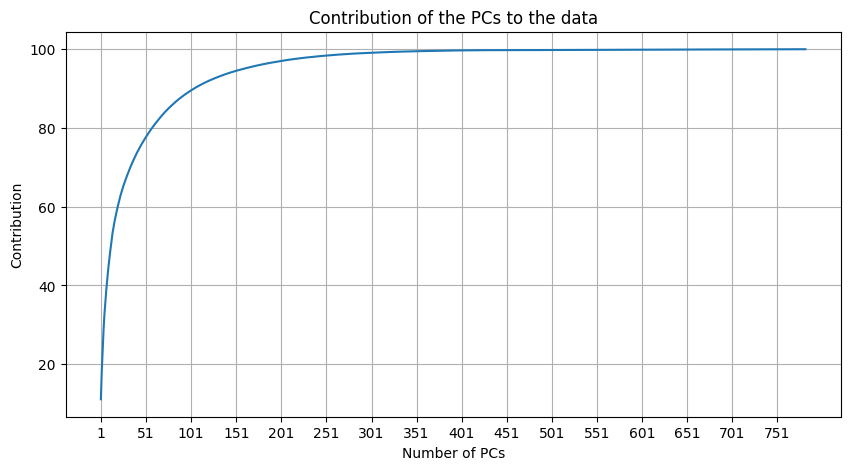

In [41]:
contributions = []
for i in range(Z.shape[1]):
  contributions.append(np.sum(e[:i+1]) / np.sum(e))

plt.figure(figsize = (10,5))
plt.plot(list(range(1, information+1)), [i*100 for i in contributions])
plt.title("Contribution of the PCs to the data")
plt.xlabel("Number of PCs")
plt.ylabel("Contribution")
plt.grid()
plt.xticks(np.arange(1, information+1, 50.0))
plt.show()

## Scaling PCs for Image Creation
Grayscale scaling

In [42]:
scZ = StandardScaler()
ZZ_train = scZ.fit_transform(Z_train)
ZZ_test = scZ.transform(Z_test)
ZZ = scZ.transform(Z)

In [43]:
#Retrieving Data for the First 256 PCs
#16^2=256
Z_train = Z_train[:,:256] #unscaled PCs
Z_test = Z_test[:,:256]
Z = Z[:,:256]
ZZ_train =  ZZ_train[:,:256] #scaled PCs
ZZ_test = ZZ_test[:,:256]
ZZ = ZZ[:,:256]

In [44]:
print('Unscaled Train set shape = ', Z_train.shape, '\nUnscaled Test set shape = ', Z_test.shape)
print('Scaled Train set shape = ', ZZ_train.shape, '\nScaled Test set shape = ', ZZ_test.shape)

Unscaled Train set shape =  (782, 256) 
Unscaled Test set shape =  (196, 256)
Scaled Train set shape =  (782, 256) 
Scaled Test set shape =  (196, 256)


# Image Creation

## Generating Images For CNN

In [45]:
def gen_images(data):
    images = []
    for r in range(0,data.shape[0]): # Cycle over rows
        pixels = []
        mini = min(data[r,:])
        maxi = max(data[r,:])
        m = (maxi-mini)/(256)

        for c in range(0,256): # Cycle over cols
            curPixel = data[r,c]
            pixels.append((((curPixel - mini) / (maxi - mini)) * 255.9).astype(np.uint8))

        # Once cols are done running add the image to the images[] array
        img = np.reshape(pixels, (16,16)) #reshape into a square image
        images.append(img)
        
    return images

In [46]:
# Generate images from each data split, use scaled PCs for generating images
all_images  = gen_images(ZZ)
x_train_img = gen_images(ZZ_train)
x_test_img  = gen_images(ZZ_test)

# Get number of rows in each data split
height_total = ZZ.shape[0]
height_train = ZZ_train.shape[0]
height_test =  ZZ_test.shape[0]

# Reshape into input shape for CNN models
# 16,16,1 indicates a 16x16 pixel greyscale image
x_train_img = np.array(x_train_img).reshape(height_train,16,16,1)
x_test_img  = np.array(x_test_img).reshape(height_test,16,16,1)
all_images  = np.array(all_images).reshape(height_total,16,16,1)

## Saving Images

In [47]:
import imageio

# Relative paths to saved folders
BadImgFolder = cwd + r"\Data\GeneratedImages\Bad"
GoodImgFolder = cwd + r"\Data\GeneratedImages\Good"

# Remove existing files
import glob

files = glob.glob(BadImgFolder + r"\*")
for f in files:
    os.remove(f)

files = glob.glob(GoodImgFolder + r"\*")
for f in files:
    os.remove(f)   

ctr1=0
ctr2=0
for img in all_images.reshape(height_total,16,16):
    
    if (y[ctr1+ctr2] == 0): #Good
        fstr = GoodImgFolder + r"\img_" + str(ctr1) + r".png"
        imageio.imwrite(fstr, img[:, :], dpi = (300,300))
        ctr1+=1
    else:
        fstr = BadImgFolder + r"\img_" + str(ctr2) + r".png"
        imageio.imwrite(fstr, img[:, :], dpi = (300,300))
        ctr2+=1

## Showing the Images

### Viewing an Image for Bad Song

<AxesSubplot: >

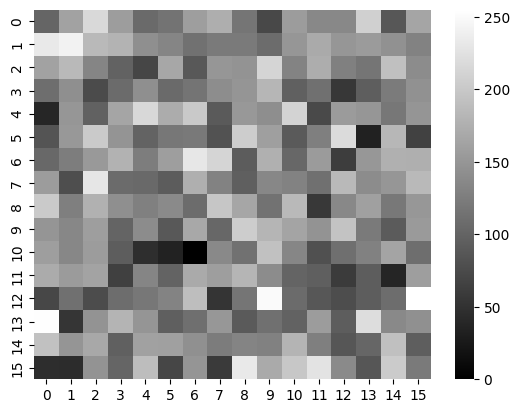

In [48]:
from PIL import Image

genimgsPath = cwd + r"\Data\GeneratedImages"

n = 156
img_0 = str(n)+".png"
filepath = genimgsPath + "\Bad"+"/img_"+img_0

img_0 = Image.open(filepath)
img_0.width
sb.heatmap(img_0, cmap = 'gray')

### Viewing an Image for Good Song

<AxesSubplot: >

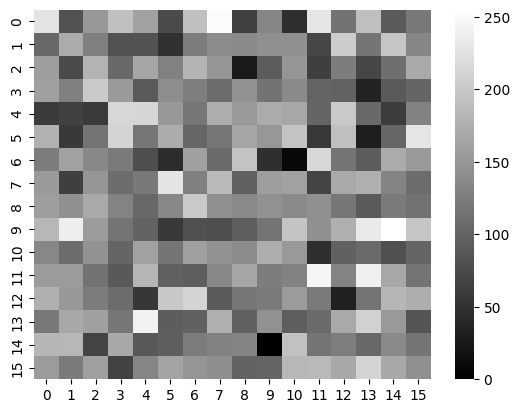

In [49]:
n = 210
img_0 = str(n)+".png"
filepath = genimgsPath + "\Good"+"/img_"+img_0

img_0 = Image.open(filepath)
img_0.width
sb.heatmap(img_0, cmap = 'gray')

## Generate Features From Images

### Defining Image Data Generator
Generate image data for each of the images.

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

genimgsPath = cwd + r"\Data\GeneratedImages"

r  = 1./255       #rescale
sr = 0.2          #shear range
zr = 0.2          #zoom range
hf = True         #horizontal flip

ValidationSplit = 0.2

imageGenerator = ImageDataGenerator(rescale = r,
                                   shear_range = sr, 
                                   zoom_range = zr,
                                   horizontal_flip = hf,
                                   validation_split = ValidationSplit
                                   )

### Generating Features

In [51]:
imgs_train = imageGenerator.flow_from_directory(genimgsPath,
                                                target_size = (16, 16),
                                                batch_size = 32,
                                                subset = "training",        #creates training subset
                                                class_mode = 'binary',
                                                shuffle = True,
                                                color_mode = "grayscale")

imgs_test = imageGenerator.flow_from_directory(genimgsPath, 
                                               target_size = (16, 16),
                                               batch_size = 32,
                                               subset = "validation",       #creates test subset
                                               class_mode = 'binary',
                                               shuffle = True,
                                               color_mode = "grayscale")
print(imgs_test.class_indices)

Found 784 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
{'Bad': 0, 'Good': 1}


# Data Exploration

## Histogram Plots
Getting some insights by plotting differnet variables in Histogram plot


For all the plots below, you can modify the bandwidth to obtain the bell shaped curve

### Data for Good Songs

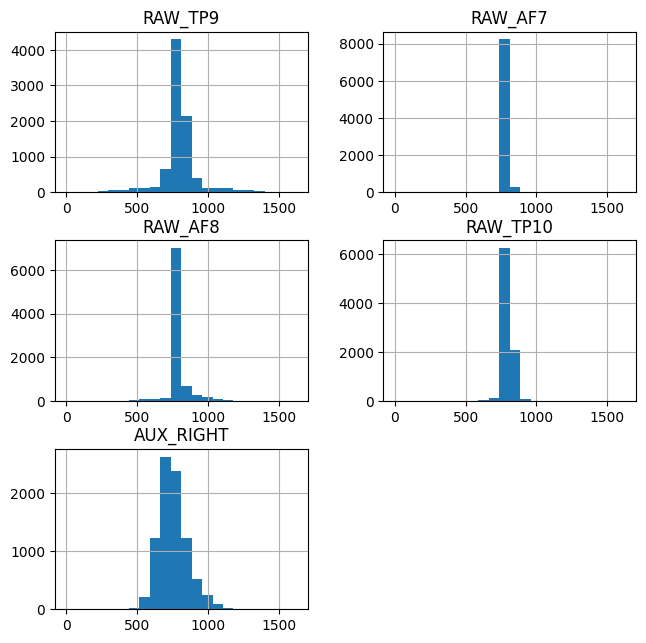

In [52]:
#Bandwidth value = 8
for i, binwidth in enumerate([8]):
    data_Good.hist(bins = int(180/binwidth), figsize = (7.5,7.5))

### Data for Bad Songs

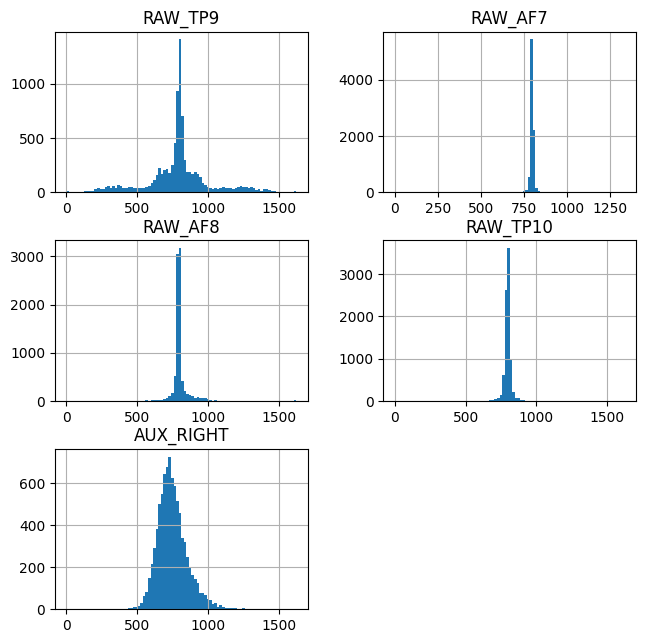

In [53]:
# Bandwidth value = 2
for i, binwidth in enumerate([2]):
    data_Bad.hist(bins = int(180/binwidth), figsize = (7.5,7.5))

### Histoplot of first 25 Principal Components

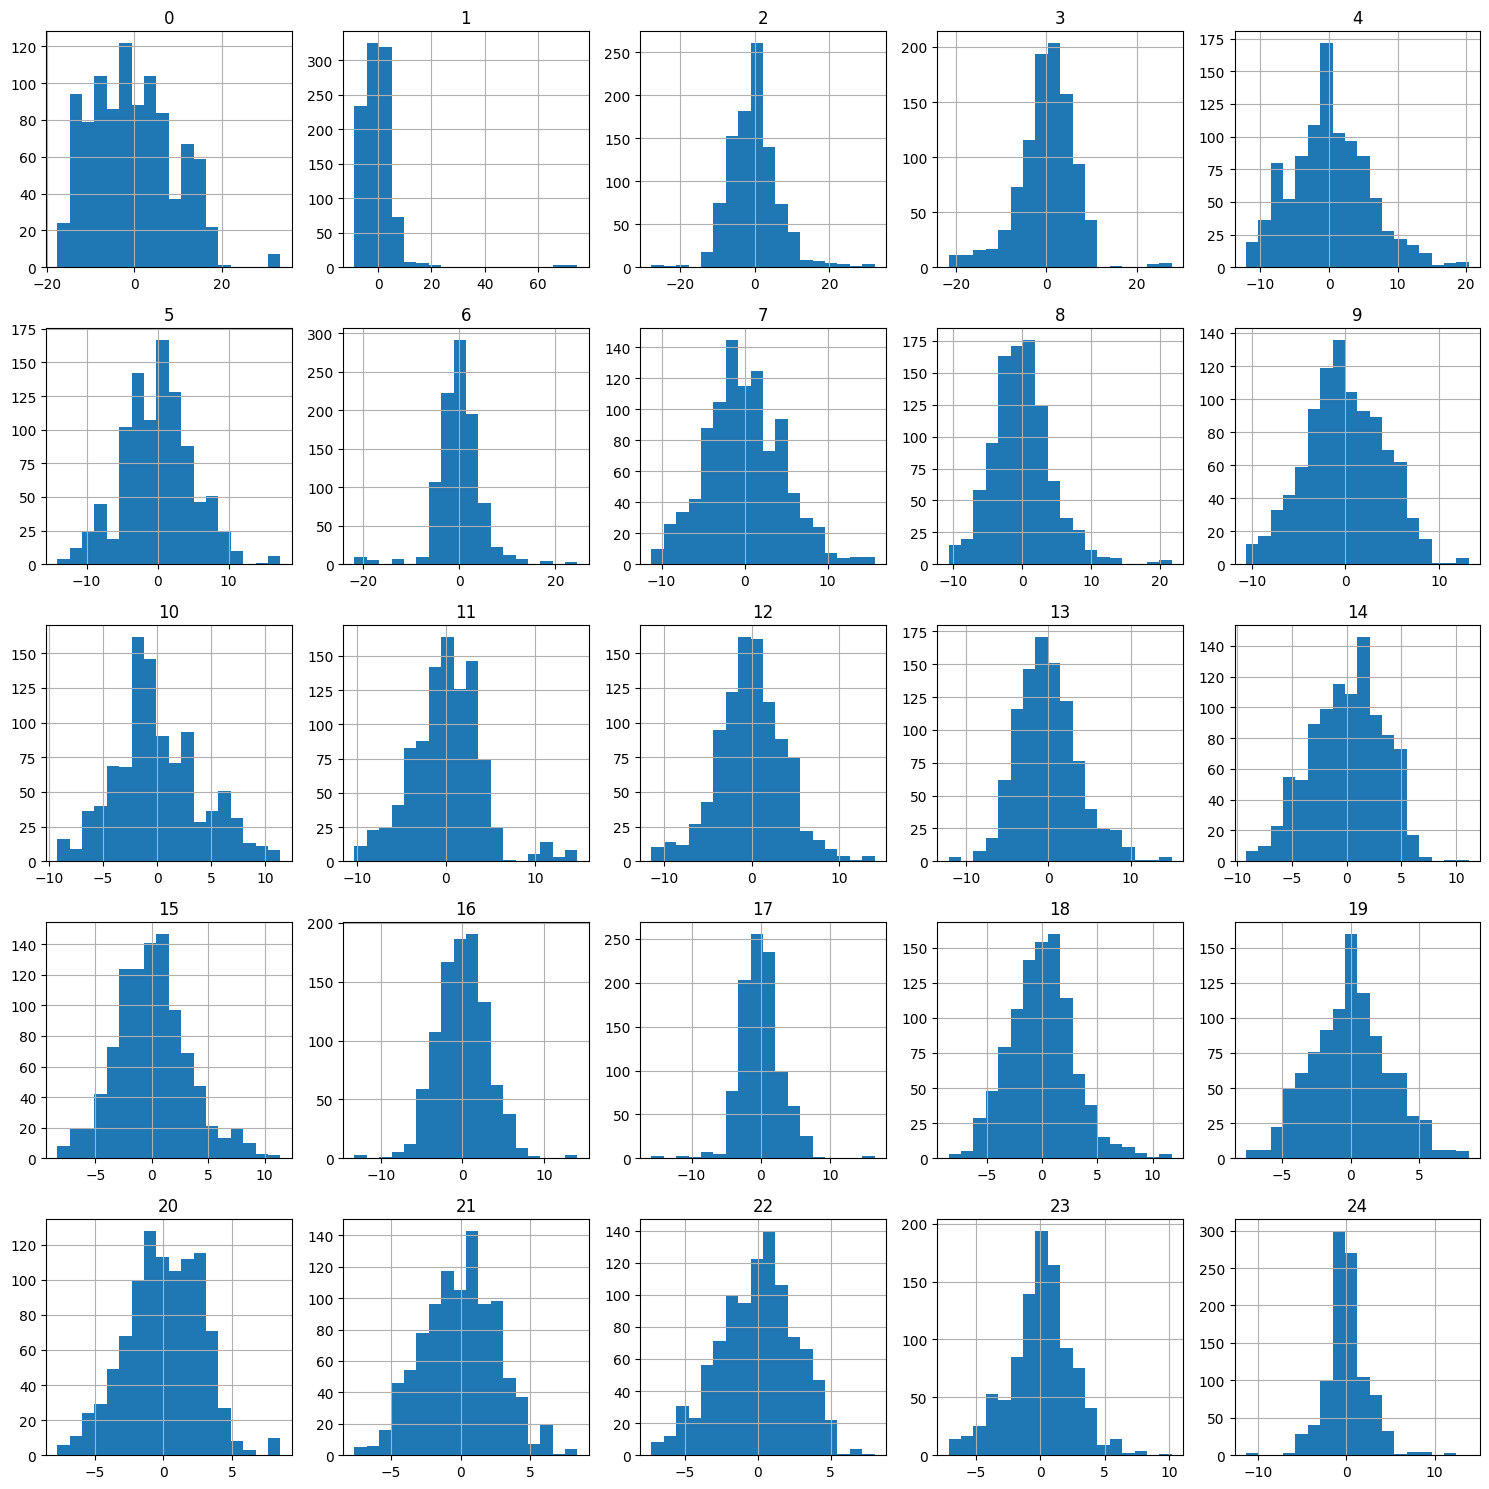

In [54]:
#Bandwidth value = 10

import warnings
warnings.filterwarnings('ignore') 
with warnings.catch_warnings():  #To catch warnings within this code
    warnings.simplefilter("ignore")
    
Z25 = Z[:,0:25] 

pc_title = []
for i in range (0,24) :
    pc_title.append(f'Principal Component {i+1}')
    
for i, binwidth in enumerate([10]):   
    pd.DataFrame(Z25).hist(bins = int(180/binwidth), figsize = (15,15))
    plt.tight_layout()

## Correlation Heatmap
### Correlation Heatmap of all 256 PCs

<AxesSubplot: title={'center': "Pearson's R correlation Matrix for the top 256 Principal Components"}>

<Figure size 1920x1440 with 0 Axes>

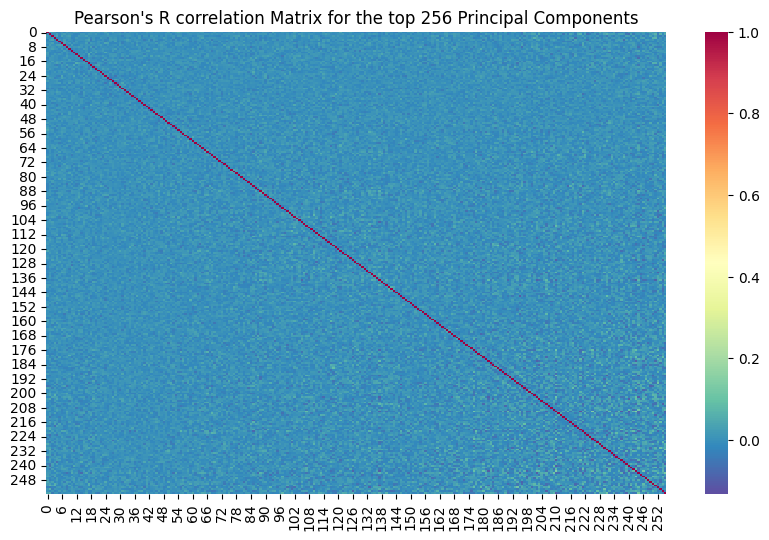

In [55]:
corr_mat = pd.DataFrame(Z).corr(method = 'pearson')
plt.figure(dpi = 300)
plt.subplots(figsize = (10,6))
plt.title("Pearson's R correlation Matrix for the top 256 Principal Components", fontsize = 12)
sb.heatmap(corr_mat, annot = False, lw=0, linecolor='white', cmap='Spectral_r')

### Correlation Heatmap of the first 25 PCs

<AxesSubplot: title={'center': "Pearson's R correlation Matrix for the top 25 Pricipal Components"}>

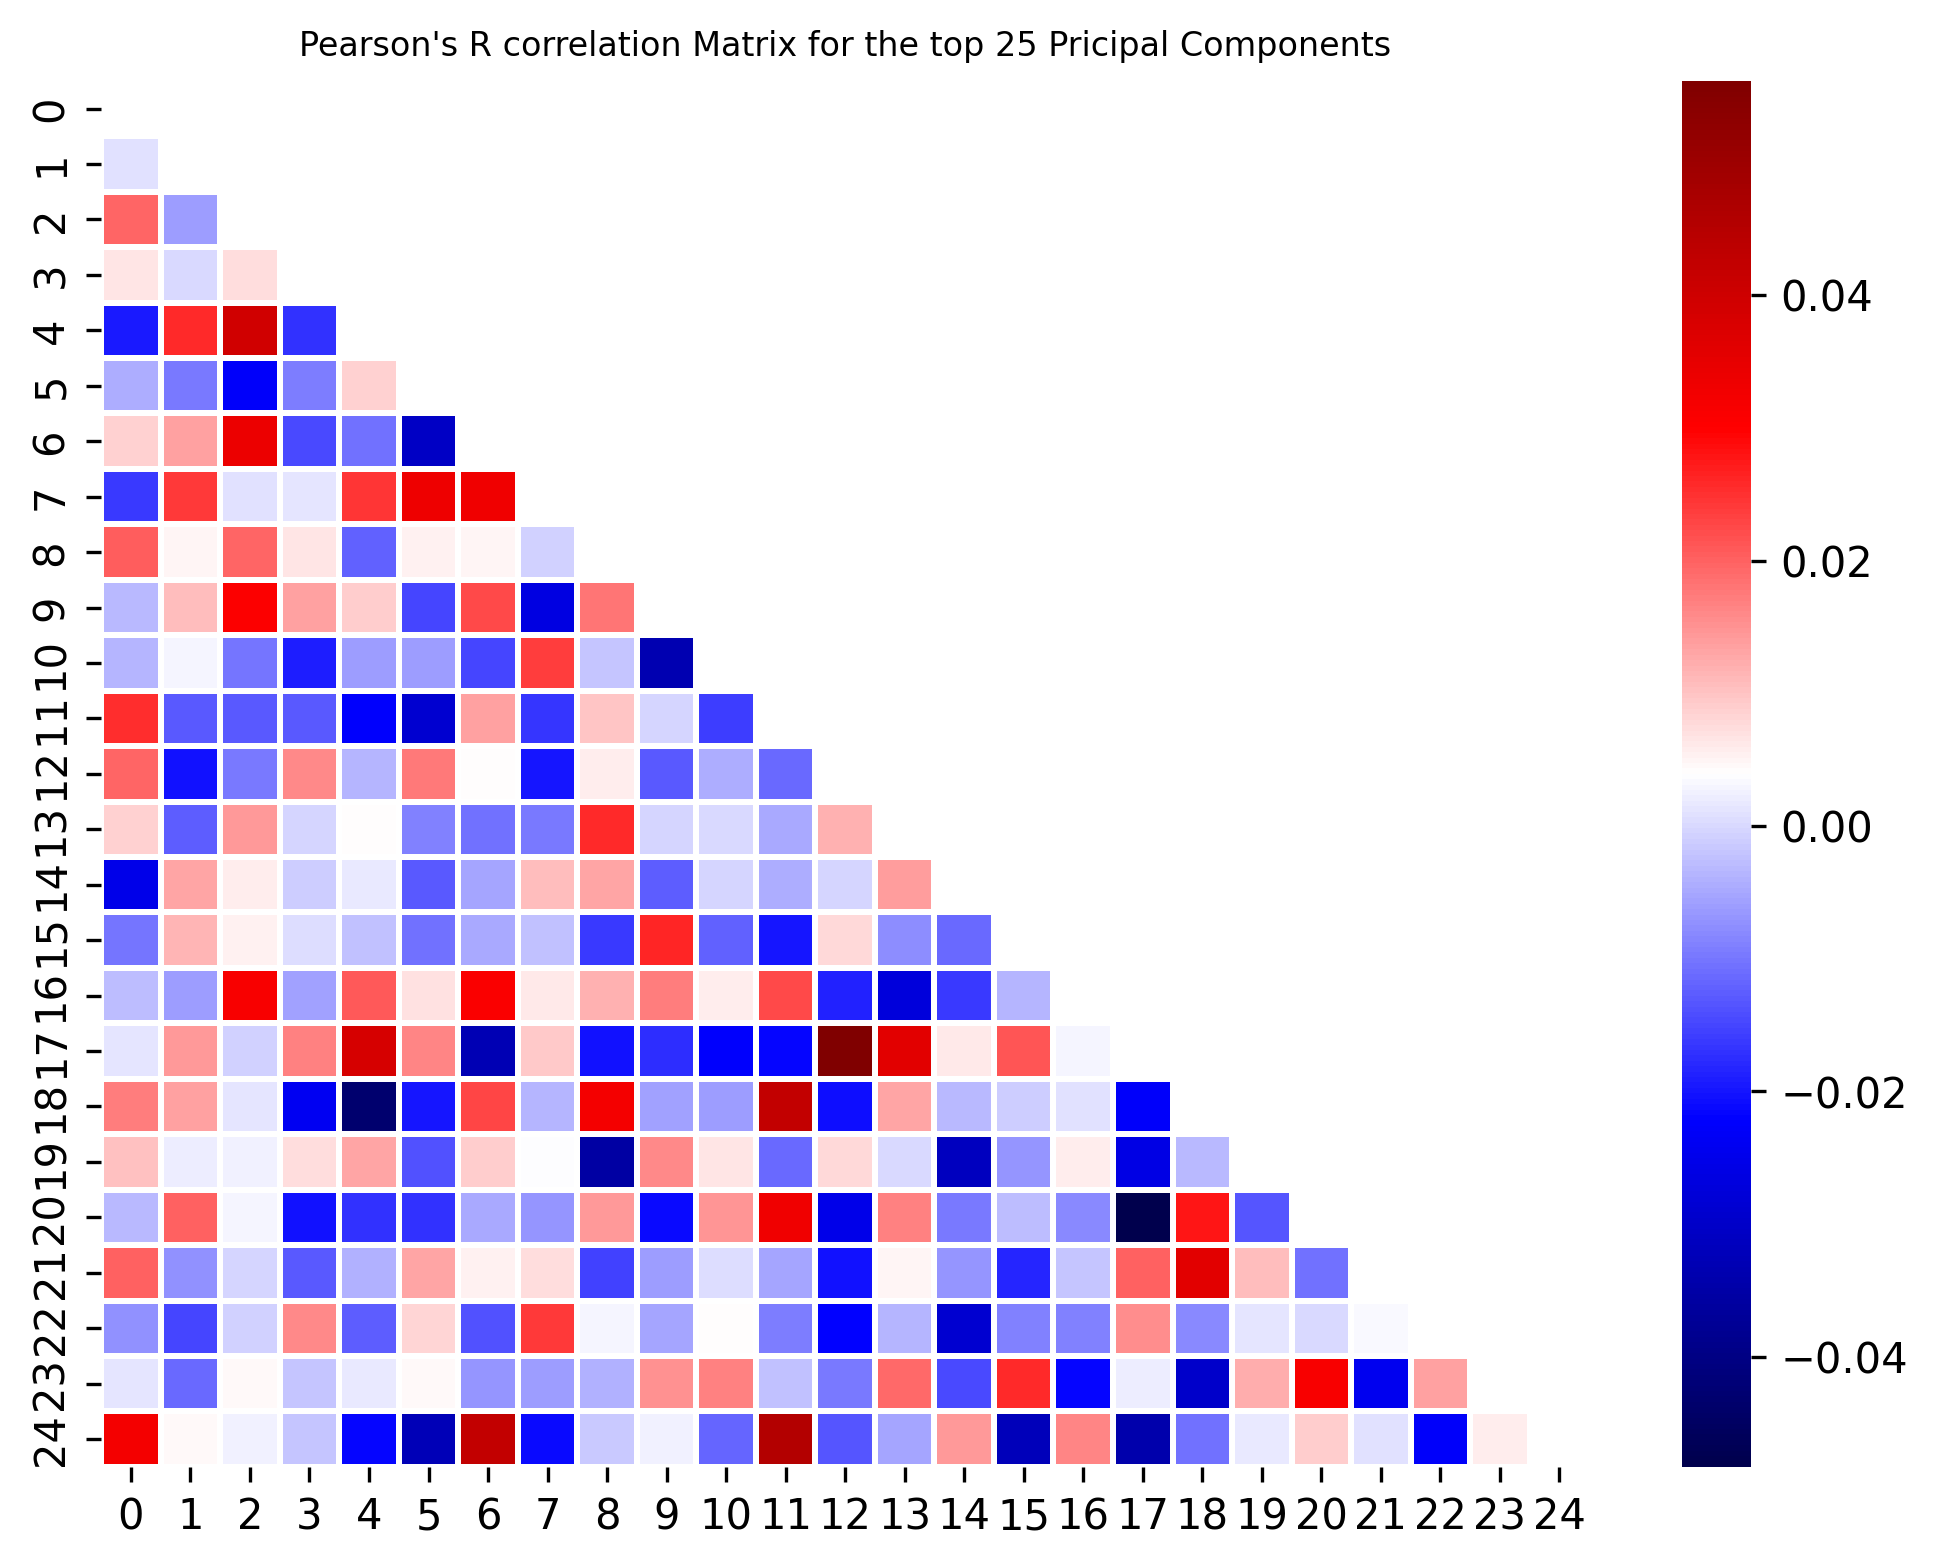

In [56]:
corr_mat = pd.DataFrame(Z[:,0:25]).corr(method='pearson')
mask = np.triu(np.ones_like(corr_mat, dtype = bool))
plt.figure(figsize = [8,6], dpi = 300)
plt.title("Pearson's R correlation Matrix for the top 25 Pricipal Components", fontsize = 8)
sb.heatmap(corr_mat, mask = mask, annot = False, lw = 1, linecolor = 'White', cmap = 'seismic', fmt = "0.2f")

The above correlation matrix reflects that there is not much correlation between PCs, which is normal and echoes with the scatter plots of PCs in Section 7.3.

<AxesSubplot: title={'center': "Pearson's R correlation Matrix for the 'Good Data'"}>

<Figure size 1920x1440 with 0 Axes>

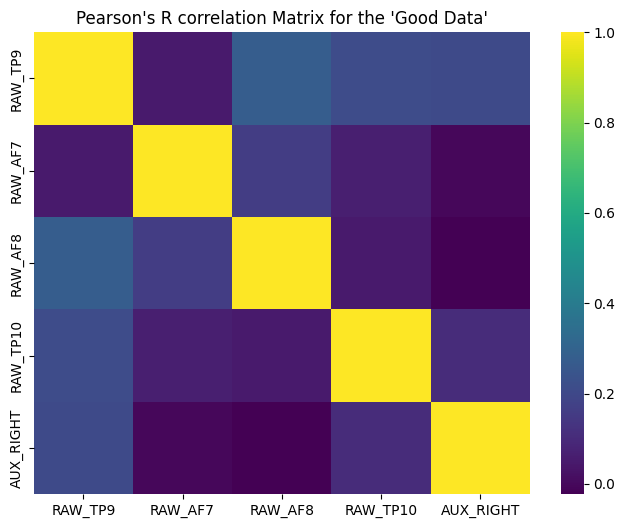

In [57]:
# Quick check of co-releation of 'good data' variables
corr_mat = pd.DataFrame(data_Good).corr(method='pearson')
plt.figure(dpi = 300)
plt.subplots(figsize = (8,6))
plt.title("Pearson's R correlation Matrix for the 'Good Data'", fontsize = 12)
sb.heatmap(corr_mat, annot = False, lw = 0, linecolor = 'white', cmap = 'viridis')

From the above plot, it shows that "Good data" is more correlated with RAW_AF8, which locates at the right front of our brain.

<AxesSubplot: title={'center': "Pearson's R correlation Matrix for the 'Bad Data'"}>

<Figure size 1920x1440 with 0 Axes>

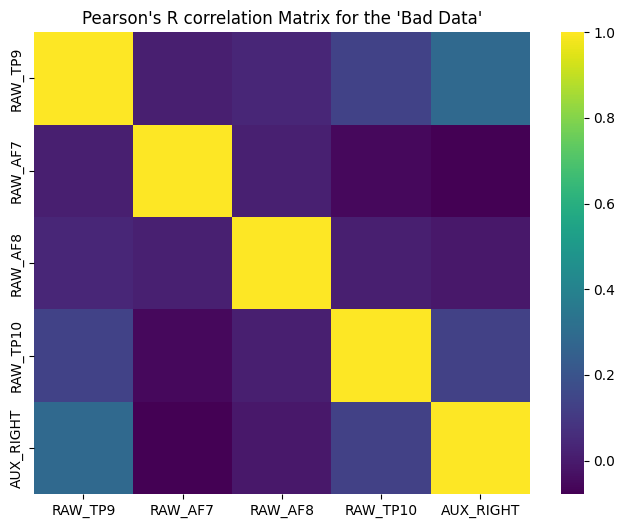

In [58]:
# Quick check of co-releation of 'Bad data' variables
corr_mat = pd.DataFrame(data_Bad).corr(method = 'pearson')
plt.figure(dpi = 300)
plt.subplots(figsize = (8,6))
plt.title("Pearson's R correlation Matrix for the 'Bad Data'", fontsize = 12)
sb.heatmap(corr_mat, annot = False, lw = 0, linecolor = 'white', cmap = 'viridis')

From the above plot, it shows that "Bad data" is more correlated with RAW_TP10, which locates at the right back side of our brain.
Note that the AUX_RIGHT is not used.

## Scatter Plot of few PCs
### Visualizing the data after transformation

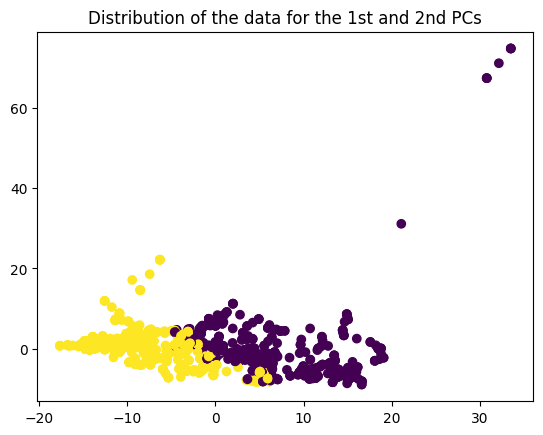

In [59]:
#Plotting PC1 and PC2
plt.scatter(Z[:,0],Z[:,1],c = y) 
plt.title("Distribution of the data for the 1st and 2nd PCs")
plt.show()

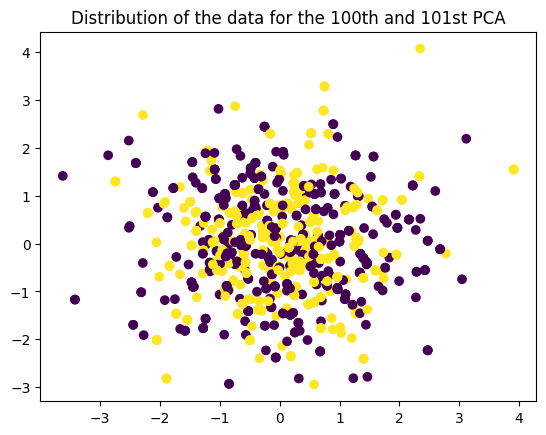

In [60]:
# Plotting PCA100 and PCA101
plt.scatter(Z[:,99],Z[:,100],c = y) 
plt.title("Distribution of the data for the 100th and 101st PCA")
plt.show()

# Building Machine Learning Models

## Basic CNN Model

###  Building the CNN Model (w/o Early Stopping)

In [61]:
# Model 1
# Initialising the Model
CNNModel_tune = tf.keras.models.Sequential()

# Adding first convolution layer
CNNModel_tune.add(tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = [16, 16, 1]))

# Pooling the First Layer
CNNModel_tune.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 1))

# Adding a Second Convolutional Layer
CNNModel_tune.add(tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'))

# Pooling the Second Layer
CNNModel_tune.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 1))

# Flattening
CNNModel_tune.add(tf.keras.layers.Flatten())

# Full Connection
CNNModel_tune.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

# Output Layer - sigmoid activation for two binary outputs: "Good" vs "Bad" song
CNNModel_tune.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) # units = number of classes

# Compiling the CNN model
CNNModel_tune.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

CNNModel_tune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [62]:
#Model 2 - Following the CNN model structure in the research
# Initialising the Model
CNNModel2_tune = tf.keras.models.Sequential()

# Adding first convolution layer
CNNModel2_tune.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [16, 16, 1]))

# Adding a Second Convolutional Layer
CNNModel2_tune.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))

# Max Pooling
CNNModel2_tune.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

# Dropout
CNNModel2_tune.add(tf.keras.layers.Dropout(0.25))

# Flattening
CNNModel2_tune.add(tf.keras.layers.Flatten())

# Full Connection
CNNModel2_tune.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))

# Dropout
CNNModel2_tune.add(tf.keras.layers.Dropout(0.5))

# Output Layer - sigmoid activation for two binary outputs: "Good" vs "Bad" song
CNNModel2_tune.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) # units = number of classes

# Compiling the CNN model
CNNModel2_tune.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

CNNModel2_tune.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1180160   
                                                      

### Training the CNN Model (w/o Early Stopping)

In [63]:
history_cnn = CNNModel_tune.fit(x = imgs_train, validation_data = imgs_test, epochs = 400, shuffle = False) 

Epoch 1/400
25/25 [==============================] - 3s 113ms/step - loss: 0.6918 - accuracy: 0.5153 - val_loss: 0.6936 - val_accuracy: 0.4845
Epoch 2/400
25/25 [==============================] - 0s 18ms/step - loss: 0.6911 - accuracy: 0.5140 - val_loss: 0.6913 - val_accuracy: 0.5258
Epoch 3/400
25/25 [==============================] - 0s 19ms/step - loss: 0.6816 - accuracy: 0.6161 - val_loss: 0.6965 - val_accuracy: 0.4433
Epoch 4/400
25/25 [==============================] - 0s 19ms/step - loss: 0.6708 - accuracy: 0.5663 - val_loss: 0.6897 - val_accuracy: 0.5722
Epoch 5/400
25/25 [==============================] - 1s 21ms/step - loss: 0.6520 - accuracy: 0.6186 - val_loss: 0.6904 - val_accuracy: 0.5722
Epoch 6/400
25/25 [==============================] - 1s 20ms/step - loss: 0.6522 - accuracy: 0.6429 - val_loss: 0.6876 - val_accuracy: 0.5412
Epoch 7/400
25/25 [==============================] - 1s 21ms/step - loss: 0.6478 - accuracy: 0.6365 - val_loss: 0.6778 - val_accuracy: 0.5670
Epoch

25/25 [==============================] - 0s 18ms/step - loss: 0.3130 - accuracy: 0.8750 - val_loss: 0.4614 - val_accuracy: 0.7680
Epoch 59/400
25/25 [==============================] - 0s 19ms/step - loss: 0.2807 - accuracy: 0.8827 - val_loss: 0.4930 - val_accuracy: 0.7887
Epoch 60/400
25/25 [==============================] - 1s 20ms/step - loss: 0.2844 - accuracy: 0.8852 - val_loss: 0.4810 - val_accuracy: 0.7732
Epoch 61/400
25/25 [==============================] - 0s 19ms/step - loss: 0.2974 - accuracy: 0.8865 - val_loss: 0.4835 - val_accuracy: 0.7835
Epoch 62/400
25/25 [==============================] - 0s 19ms/step - loss: 0.2863 - accuracy: 0.8763 - val_loss: 0.4881 - val_accuracy: 0.7990
Epoch 63/400
25/25 [==============================] - 0s 18ms/step - loss: 0.2692 - accuracy: 0.8890 - val_loss: 0.5060 - val_accuracy: 0.7938
Epoch 64/400
25/25 [==============================] - 0s 19ms/step - loss: 0.2868 - accuracy: 0.8788 - val_loss: 0.4090 - val_accuracy: 0.8454
Epoch 65/400

25/25 [==============================] - 0s 19ms/step - loss: 0.1387 - accuracy: 0.9439 - val_loss: 0.3280 - val_accuracy: 0.8402
Epoch 116/400
25/25 [==============================] - 0s 19ms/step - loss: 0.1336 - accuracy: 0.9541 - val_loss: 0.4212 - val_accuracy: 0.8247
Epoch 117/400
25/25 [==============================] - 0s 19ms/step - loss: 0.1574 - accuracy: 0.9362 - val_loss: 0.3838 - val_accuracy: 0.8299
Epoch 118/400
25/25 [==============================] - 0s 19ms/step - loss: 0.1353 - accuracy: 0.9566 - val_loss: 0.2702 - val_accuracy: 0.8918
Epoch 119/400
25/25 [==============================] - 0s 19ms/step - loss: 0.1418 - accuracy: 0.9503 - val_loss: 0.4240 - val_accuracy: 0.8454
Epoch 120/400
25/25 [==============================] - 0s 19ms/step - loss: 0.1404 - accuracy: 0.9452 - val_loss: 0.3635 - val_accuracy: 0.8454
Epoch 121/400
25/25 [==============================] - 0s 19ms/step - loss: 0.1652 - accuracy: 0.9477 - val_loss: 0.3582 - val_accuracy: 0.8402
Epoch 

Epoch 172/400
25/25 [==============================] - 1s 20ms/step - loss: 0.0771 - accuracy: 0.9770 - val_loss: 0.2703 - val_accuracy: 0.8557
Epoch 173/400
25/25 [==============================] - 0s 19ms/step - loss: 0.0712 - accuracy: 0.9796 - val_loss: 0.3147 - val_accuracy: 0.8763
Epoch 174/400
25/25 [==============================] - 1s 20ms/step - loss: 0.0675 - accuracy: 0.9770 - val_loss: 0.4262 - val_accuracy: 0.8454
Epoch 175/400
25/25 [==============================] - 1s 20ms/step - loss: 0.0642 - accuracy: 0.9770 - val_loss: 0.3991 - val_accuracy: 0.8505
Epoch 176/400
25/25 [==============================] - 0s 19ms/step - loss: 0.0713 - accuracy: 0.9758 - val_loss: 0.3248 - val_accuracy: 0.8918
Epoch 177/400
25/25 [==============================] - 1s 20ms/step - loss: 0.0650 - accuracy: 0.9821 - val_loss: 0.3665 - val_accuracy: 0.8814
Epoch 178/400
25/25 [==============================] - 0s 19ms/step - loss: 0.0571 - accuracy: 0.9847 - val_loss: 0.2889 - val_accuracy:

Epoch 229/400
25/25 [==============================] - 0s 19ms/step - loss: 0.0312 - accuracy: 0.9936 - val_loss: 0.4185 - val_accuracy: 0.8608
Epoch 230/400
25/25 [==============================] - 1s 20ms/step - loss: 0.0424 - accuracy: 0.9872 - val_loss: 0.3953 - val_accuracy: 0.8763
Epoch 231/400
25/25 [==============================] - 0s 19ms/step - loss: 0.0315 - accuracy: 0.9962 - val_loss: 0.3704 - val_accuracy: 0.9072
Epoch 232/400
25/25 [==============================] - 1s 20ms/step - loss: 0.0367 - accuracy: 0.9898 - val_loss: 0.3641 - val_accuracy: 0.8608
Epoch 233/400
25/25 [==============================] - 1s 20ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.4191 - val_accuracy: 0.8608
Epoch 234/400
25/25 [==============================] - 1s 20ms/step - loss: 0.0413 - accuracy: 0.9860 - val_loss: 0.4127 - val_accuracy: 0.8557
Epoch 235/400
25/25 [==============================] - 1s 20ms/step - loss: 0.0355 - accuracy: 0.9911 - val_loss: 0.3757 - val_accuracy:

Epoch 286/400
25/25 [==============================] - 1s 23ms/step - loss: 0.0236 - accuracy: 0.9962 - val_loss: 0.3814 - val_accuracy: 0.8969
Epoch 287/400
25/25 [==============================] - 1s 23ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.4545 - val_accuracy: 0.8866
Epoch 288/400
25/25 [==============================] - 1s 22ms/step - loss: 0.0157 - accuracy: 0.9962 - val_loss: 0.4076 - val_accuracy: 0.8814
Epoch 289/400
25/25 [==============================] - 1s 21ms/step - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.3909 - val_accuracy: 0.8918
Epoch 290/400
25/25 [==============================] - 1s 21ms/step - loss: 0.0385 - accuracy: 0.9834 - val_loss: 0.4206 - val_accuracy: 0.8454
Epoch 291/400
25/25 [==============================] - 1s 22ms/step - loss: 0.0254 - accuracy: 0.9911 - val_loss: 0.4589 - val_accuracy: 0.8454
Epoch 292/400
25/25 [==============================] - 1s 21ms/step - loss: 0.0221 - accuracy: 0.9962 - val_loss: 0.4484 - val_accuracy:

Epoch 343/400
25/25 [==============================] - 1s 24ms/step - loss: 0.0173 - accuracy: 0.9962 - val_loss: 0.5222 - val_accuracy: 0.8711
Epoch 344/400
25/25 [==============================] - 1s 24ms/step - loss: 0.0255 - accuracy: 0.9949 - val_loss: 0.6057 - val_accuracy: 0.8454
Epoch 345/400
25/25 [==============================] - 1s 26ms/step - loss: 0.0195 - accuracy: 0.9949 - val_loss: 0.5562 - val_accuracy: 0.8557
Epoch 346/400
25/25 [==============================] - 1s 26ms/step - loss: 0.0121 - accuracy: 0.9974 - val_loss: 0.4293 - val_accuracy: 0.8814
Epoch 347/400
25/25 [==============================] - 1s 27ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.4664 - val_accuracy: 0.8608
Epoch 348/400
25/25 [==============================] - 1s 30ms/step - loss: 0.0297 - accuracy: 0.9898 - val_loss: 0.5646 - val_accuracy: 0.8608
Epoch 349/400
25/25 [==============================] - 1s 29ms/step - loss: 0.0181 - accuracy: 0.9962 - val_loss: 0.5881 - val_accuracy:

Epoch 400/400
25/25 [==============================] - 1s 23ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.4711 - val_accuracy: 0.8660


In [64]:
history_cnn2 = CNNModel2_tune.fit(x = imgs_train, validation_data = imgs_test, epochs = 400, shuffle = False) 

Epoch 1/400
25/25 [==============================] - 1s 36ms/step - loss: 0.7006 - accuracy: 0.5242 - val_loss: 0.6927 - val_accuracy: 0.5155
Epoch 2/400
25/25 [==============================] - 1s 33ms/step - loss: 0.6925 - accuracy: 0.5115 - val_loss: 0.6919 - val_accuracy: 0.5103
Epoch 3/400
25/25 [==============================] - 1s 35ms/step - loss: 0.6925 - accuracy: 0.5179 - val_loss: 0.6905 - val_accuracy: 0.4897
Epoch 4/400
25/25 [==============================] - 1s 38ms/step - loss: 0.6888 - accuracy: 0.5395 - val_loss: 0.6886 - val_accuracy: 0.6443
Epoch 5/400
25/25 [==============================] - 1s 36ms/step - loss: 0.6857 - accuracy: 0.5485 - val_loss: 0.6860 - val_accuracy: 0.6186
Epoch 6/400
25/25 [==============================] - 1s 36ms/step - loss: 0.6773 - accuracy: 0.5944 - val_loss: 0.6842 - val_accuracy: 0.4845
Epoch 7/400
25/25 [==============================] - 1s 37ms/step - loss: 0.6615 - accuracy: 0.6237 - val_loss: 0.6841 - val_accuracy: 0.5876
Epoch 

25/25 [==============================] - 1s 37ms/step - loss: 0.2193 - accuracy: 0.9056 - val_loss: 0.2822 - val_accuracy: 0.8608
Epoch 59/400
25/25 [==============================] - 1s 37ms/step - loss: 0.2241 - accuracy: 0.8967 - val_loss: 0.3193 - val_accuracy: 0.8505
Epoch 60/400
25/25 [==============================] - 1s 36ms/step - loss: 0.2015 - accuracy: 0.9196 - val_loss: 0.2934 - val_accuracy: 0.8660
Epoch 61/400
25/25 [==============================] - 1s 37ms/step - loss: 0.2363 - accuracy: 0.9043 - val_loss: 0.2671 - val_accuracy: 0.8711
Epoch 62/400
25/25 [==============================] - 1s 37ms/step - loss: 0.2119 - accuracy: 0.9171 - val_loss: 0.3152 - val_accuracy: 0.8454
Epoch 63/400
25/25 [==============================] - 1s 36ms/step - loss: 0.2079 - accuracy: 0.9120 - val_loss: 0.2906 - val_accuracy: 0.8660
Epoch 64/400
25/25 [==============================] - 1s 36ms/step - loss: 0.1625 - accuracy: 0.9362 - val_loss: 0.2785 - val_accuracy: 0.8763
Epoch 65/400

25/25 [==============================] - 1s 32ms/step - loss: 0.1009 - accuracy: 0.9656 - val_loss: 0.2432 - val_accuracy: 0.8969
Epoch 116/400
25/25 [==============================] - 1s 31ms/step - loss: 0.0864 - accuracy: 0.9694 - val_loss: 0.2307 - val_accuracy: 0.8969
Epoch 117/400
25/25 [==============================] - 1s 35ms/step - loss: 0.0863 - accuracy: 0.9668 - val_loss: 0.2652 - val_accuracy: 0.9124
Epoch 118/400
25/25 [==============================] - 1s 36ms/step - loss: 0.0714 - accuracy: 0.9745 - val_loss: 0.2284 - val_accuracy: 0.9021
Epoch 119/400
25/25 [==============================] - 1s 38ms/step - loss: 0.0823 - accuracy: 0.9681 - val_loss: 0.2348 - val_accuracy: 0.9021
Epoch 120/400
25/25 [==============================] - 1s 36ms/step - loss: 0.0949 - accuracy: 0.9592 - val_loss: 0.3291 - val_accuracy: 0.8763
Epoch 121/400
25/25 [==============================] - 1s 36ms/step - loss: 0.0770 - accuracy: 0.9668 - val_loss: 0.2430 - val_accuracy: 0.8969
Epoch 

Epoch 172/400
25/25 [==============================] - 1s 36ms/step - loss: 0.0422 - accuracy: 0.9860 - val_loss: 0.2757 - val_accuracy: 0.9124
Epoch 173/400
25/25 [==============================] - 1s 35ms/step - loss: 0.0436 - accuracy: 0.9872 - val_loss: 0.2280 - val_accuracy: 0.9072
Epoch 174/400
25/25 [==============================] - 1s 32ms/step - loss: 0.0369 - accuracy: 0.9834 - val_loss: 0.2509 - val_accuracy: 0.9072
Epoch 175/400
25/25 [==============================] - 1s 33ms/step - loss: 0.0495 - accuracy: 0.9745 - val_loss: 0.1546 - val_accuracy: 0.9485
Epoch 176/400
25/25 [==============================] - 1s 34ms/step - loss: 0.0406 - accuracy: 0.9847 - val_loss: 0.2204 - val_accuracy: 0.9278
Epoch 177/400
25/25 [==============================] - 1s 36ms/step - loss: 0.0422 - accuracy: 0.9821 - val_loss: 0.2326 - val_accuracy: 0.9124
Epoch 178/400
25/25 [==============================] - 1s 39ms/step - loss: 0.0427 - accuracy: 0.9783 - val_loss: 0.2019 - val_accuracy:

Epoch 229/400
25/25 [==============================] - 1s 44ms/step - loss: 0.0352 - accuracy: 0.9872 - val_loss: 0.2383 - val_accuracy: 0.9330
Epoch 230/400
25/25 [==============================] - 1s 35ms/step - loss: 0.0309 - accuracy: 0.9898 - val_loss: 0.2799 - val_accuracy: 0.9175
Epoch 231/400
25/25 [==============================] - 1s 38ms/step - loss: 0.0238 - accuracy: 0.9936 - val_loss: 0.2778 - val_accuracy: 0.9278
Epoch 232/400
25/25 [==============================] - 1s 41ms/step - loss: 0.0313 - accuracy: 0.9847 - val_loss: 0.3513 - val_accuracy: 0.8918
Epoch 233/400
25/25 [==============================] - 1s 34ms/step - loss: 0.0307 - accuracy: 0.9872 - val_loss: 0.2633 - val_accuracy: 0.9175
Epoch 234/400
25/25 [==============================] - 1s 35ms/step - loss: 0.0413 - accuracy: 0.9860 - val_loss: 0.2609 - val_accuracy: 0.9072
Epoch 235/400
25/25 [==============================] - 1s 36ms/step - loss: 0.0338 - accuracy: 0.9885 - val_loss: 0.2903 - val_accuracy:

Epoch 286/400
25/25 [==============================] - 1s 35ms/step - loss: 0.0208 - accuracy: 0.9911 - val_loss: 0.3294 - val_accuracy: 0.8969
Epoch 287/400
25/25 [==============================] - 1s 37ms/step - loss: 0.0197 - accuracy: 0.9923 - val_loss: 0.3525 - val_accuracy: 0.9021
Epoch 288/400
25/25 [==============================] - 1s 45ms/step - loss: 0.0314 - accuracy: 0.9885 - val_loss: 0.3653 - val_accuracy: 0.9021
Epoch 289/400
25/25 [==============================] - 1s 37ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.3466 - val_accuracy: 0.8866
Epoch 290/400
25/25 [==============================] - 1s 34ms/step - loss: 0.0270 - accuracy: 0.9898 - val_loss: 0.4031 - val_accuracy: 0.9021
Epoch 291/400
25/25 [==============================] - 1s 40ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.3066 - val_accuracy: 0.8711
Epoch 292/400
25/25 [==============================] - 1s 38ms/step - loss: 0.0278 - accuracy: 0.9885 - val_loss: 0.3526 - val_accuracy:

Epoch 343/400
25/25 [==============================] - 1s 36ms/step - loss: 0.0115 - accuracy: 0.9974 - val_loss: 0.3680 - val_accuracy: 0.8918
Epoch 344/400
25/25 [==============================] - 1s 37ms/step - loss: 0.0124 - accuracy: 0.9987 - val_loss: 0.3446 - val_accuracy: 0.9021
Epoch 345/400
25/25 [==============================] - 1s 36ms/step - loss: 0.0257 - accuracy: 0.9898 - val_loss: 0.3652 - val_accuracy: 0.9072
Epoch 346/400
25/25 [==============================] - 1s 37ms/step - loss: 0.0325 - accuracy: 0.9885 - val_loss: 0.1973 - val_accuracy: 0.9330
Epoch 347/400
25/25 [==============================] - 1s 36ms/step - loss: 0.0533 - accuracy: 0.9847 - val_loss: 0.2347 - val_accuracy: 0.9175
Epoch 348/400
25/25 [==============================] - 1s 39ms/step - loss: 0.0245 - accuracy: 0.9949 - val_loss: 0.2221 - val_accuracy: 0.9330
Epoch 349/400
25/25 [==============================] - 1s 38ms/step - loss: 0.0283 - accuracy: 0.9949 - val_loss: 0.3064 - val_accuracy:

Epoch 400/400
25/25 [==============================] - 1s 43ms/step - loss: 0.0133 - accuracy: 0.9949 - val_loss: 0.3555 - val_accuracy: 0.8969


### Evaluating CNN Model (w/o Early Stopping) Accuracy

In [65]:
# Evaluating Model Accuracy on training dataset
_, accuracy = CNNModel_tune.evaluate(imgs_train)
print('The CNN Model 1 Accuracy is: %.2f %%' % (accuracy*100))

_, accuracy2 = CNNModel2_tune.evaluate(imgs_train)
print('The CNN Model 2 Accuracy is: %.2f %%' % (accuracy2*100))

25/25 [==============================] - 1s 19ms/step - loss: 0.0100 - accuracy: 0.9987
The CNN Model 1 Accuracy is: 99.87 %
25/25 [==============================] - 1s 20ms/step - loss: 6.7099e-04 - accuracy: 1.0000
The CNN Model 2 Accuracy is: 100.00 %


In [66]:
# Evaluating Model Accuarcy on testing dataset
_, accuracy = CNNModel_tune.evaluate(imgs_test)
print('The CNN Model 1 Accuracy is: %.2f %%' % (accuracy*100))

_, accuracy2 = CNNModel2_tune.evaluate(imgs_test)
print('The CNN Model 2 Accuracy is: %.2f %%' % (accuracy2*100))

7/7 [==============================] - 0s 14ms/step - loss: 0.6510 - accuracy: 0.8814
The CNN Model 1 Accuracy is: 88.14 %
7/7 [==============================] - 0s 14ms/step - loss: 0.3466 - accuracy: 0.9175
The CNN Model 2 Accuracy is: 91.75 %


### Plotting the CNN Model (w/o Early Stopping) Results

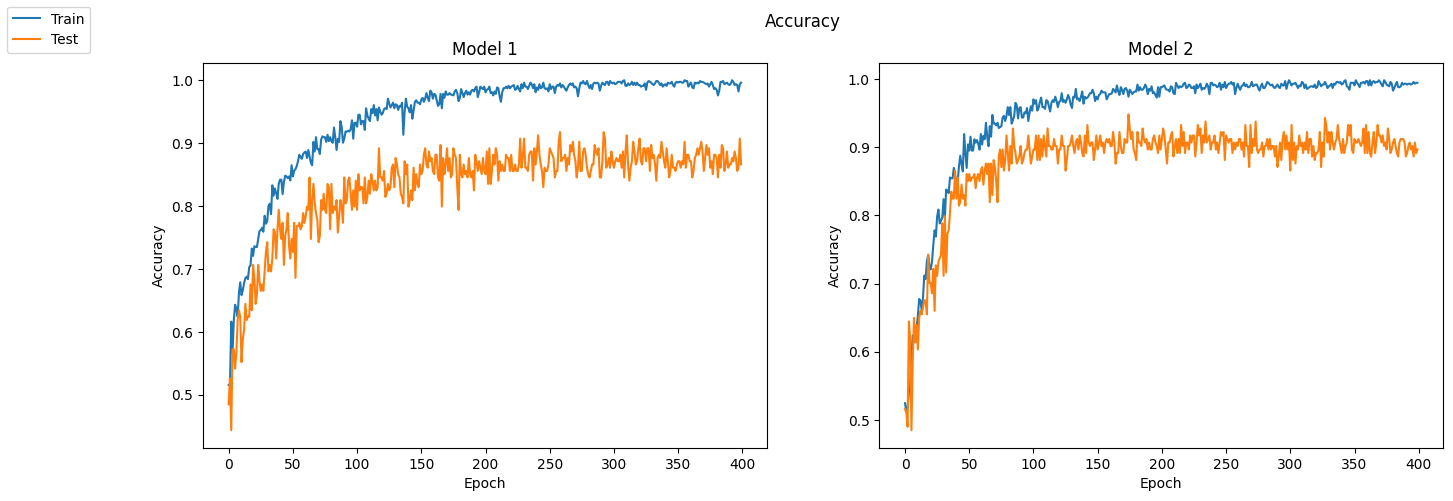

In [67]:
h = [history_cnn, history_cnn2]
fig, axs = plt.subplots(1,2, sharey = False, figsize = (16,5))
fig.suptitle('Accuracy')
for i in range(2):
  axs[i].plot(h[i].history['accuracy'])
  axs[i].plot(h[i].history['val_accuracy'])
  axs[i].set_title("Model {}".format(i + 1))

for ax in axs.flat:
    ax.set(xlabel = 'Epoch', ylabel = 'Accuracy')

fig.legend(labels = ['Train','Test'], loc = "upper left")
plt.show()

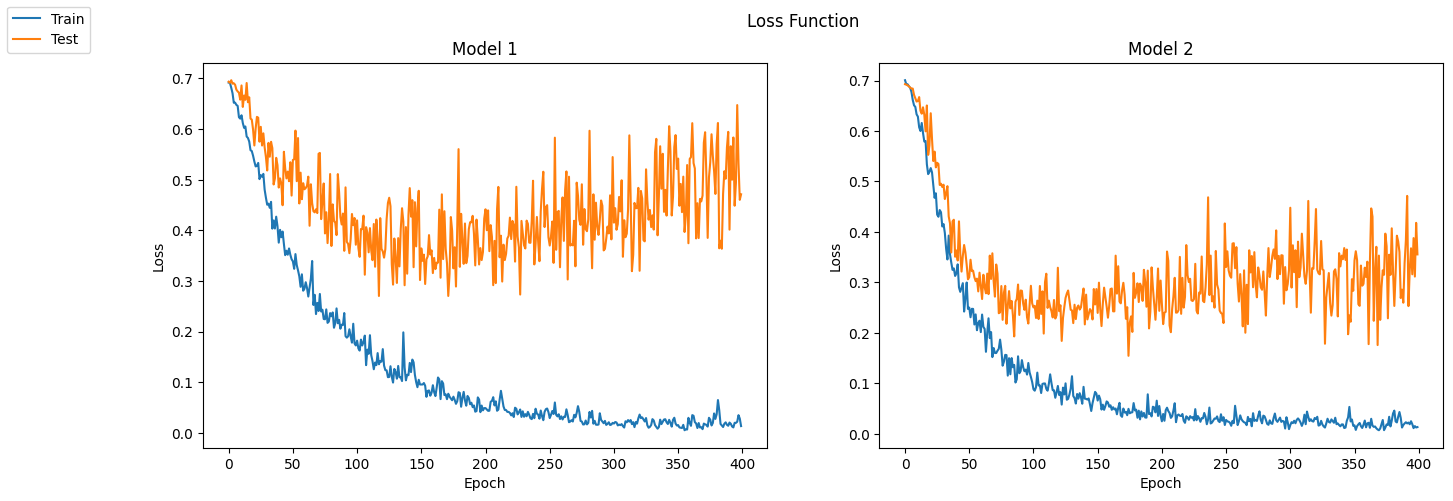

In [68]:
h = [history_cnn, history_cnn2]
fig, axs = plt.subplots(1,2, sharey=False, figsize = (16,5))
fig.suptitle('Loss Function')
for i in range(2):
  axs[i].plot(h[i].history['loss'])
  axs[i].plot(h[i].history['val_loss'])
  axs[i].set_title("Model {}".format(i + 1))

for ax in axs.flat:
    ax.set(xlabel = 'Epoch', ylabel = 'Loss')

fig.legend(labels = ['Train','Test'], loc = "upper left")
plt.show()

###  Building the CNN Model (w/ Early Stopping)

In [69]:
# Model 1
# Initialising the Model
CNNModel = tf.keras.models.Sequential()

# Adding first convolution layer
CNNModel.add(tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = [16, 16, 1]))

# Pooling the First Layer
CNNModel.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 1))

# Adding a Second Convolutional Layer
CNNModel.add(tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'))

# Pooling the Second Layer
CNNModel.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 1))

# Flattening
CNNModel.add(tf.keras.layers.Flatten())

# Full Connection
CNNModel.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

# Output Layer - sigmoid activation for two binary outputs: "Good" vs "Bad" song
CNNModel.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) # units = number of classes

# Compiling the CNN model
CNNModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

CNNModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 10)        100       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [70]:
#Model 2 - Following the CNN model structure in the research
# Initialising the Model
CNNModel2 = tf.keras.models.Sequential()

# Adding first convolution layer
CNNModel2.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [16, 16, 1]))

# Adding a Second Convolutional Layer
CNNModel2.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))

# Max Pooling
CNNModel2.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

# Dropout
CNNModel2.add(tf.keras.layers.Dropout(0.25))

# Flattening
CNNModel2.add(tf.keras.layers.Flatten())

# Full Connection
CNNModel2.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))

# Dropout
CNNModel2.add(tf.keras.layers.Dropout(0.5))

# Output Layer - sigmoid activation for two binary outputs: "Good" vs "Bad" song
CNNModel2.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) # units = number of classes

# Compiling the CNN model
CNNModel2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

CNNModel2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1180160   
                                                      

### Training the CNN Model (w/ Early Stopping)
Early stopping to prevent the model from overfitting the training set.

In [71]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 30, restore_best_weights = True)

In [72]:
history_cnn3 = CNNModel.fit(x = imgs_train, validation_data = imgs_test, epochs = 400, callbacks = es, shuffle = False) 

Epoch 1/400
25/25 [==============================] - 1s 27ms/step - loss: 0.7000 - accuracy: 0.5051 - val_loss: 0.6914 - val_accuracy: 0.5361
Epoch 2/400
25/25 [==============================] - 1s 23ms/step - loss: 0.6895 - accuracy: 0.5485 - val_loss: 0.6880 - val_accuracy: 0.5206
Epoch 3/400
25/25 [==============================] - 1s 22ms/step - loss: 0.6732 - accuracy: 0.5855 - val_loss: 0.6781 - val_accuracy: 0.5773
Epoch 4/400
25/25 [==============================] - 1s 22ms/step - loss: 0.6529 - accuracy: 0.6288 - val_loss: 0.6864 - val_accuracy: 0.5722
Epoch 5/400
25/25 [==============================] - 1s 22ms/step - loss: 0.6423 - accuracy: 0.6441 - val_loss: 0.6659 - val_accuracy: 0.5825
Epoch 6/400
25/25 [==============================] - 1s 22ms/step - loss: 0.6297 - accuracy: 0.6671 - val_loss: 0.6894 - val_accuracy: 0.5876
Epoch 7/400
25/25 [==============================] - 1s 21ms/step - loss: 0.6132 - accuracy: 0.6747 - val_loss: 0.6650 - val_accuracy: 0.6031
Epoch 

25/25 [==============================] - 1s 27ms/step - loss: 0.2892 - accuracy: 0.8852 - val_loss: 0.3609 - val_accuracy: 0.8041
Epoch 59/400
25/25 [==============================] - 1s 25ms/step - loss: 0.2993 - accuracy: 0.8610 - val_loss: 0.4016 - val_accuracy: 0.7887
Epoch 60/400
25/25 [==============================] - 1s 25ms/step - loss: 0.2746 - accuracy: 0.8750 - val_loss: 0.4159 - val_accuracy: 0.7990
Epoch 61/400
25/25 [==============================] - 1s 24ms/step - loss: 0.2517 - accuracy: 0.8941 - val_loss: 0.4890 - val_accuracy: 0.7423
Epoch 62/400
25/25 [==============================] - 1s 25ms/step - loss: 0.2828 - accuracy: 0.8737 - val_loss: 0.4073 - val_accuracy: 0.7629
Epoch 63/400
25/25 [==============================] - 1s 24ms/step - loss: 0.2781 - accuracy: 0.8865 - val_loss: 0.3661 - val_accuracy: 0.8402
Epoch 64/400
25/25 [==============================] - 1s 23ms/step - loss: 0.2393 - accuracy: 0.9094 - val_loss: 0.4423 - val_accuracy: 0.7835
Epoch 65/400

25/25 [==============================] - 1s 23ms/step - loss: 0.1176 - accuracy: 0.9630 - val_loss: 0.4297 - val_accuracy: 0.8505
Epoch 116/400
25/25 [==============================] - 1s 23ms/step - loss: 0.0869 - accuracy: 0.9796 - val_loss: 0.3020 - val_accuracy: 0.8711
Epoch 117/400
25/25 [==============================] - 1s 26ms/step - loss: 0.0845 - accuracy: 0.9758 - val_loss: 0.3708 - val_accuracy: 0.8454
Epoch 118/400
25/25 [==============================] - 1s 24ms/step - loss: 0.0992 - accuracy: 0.9643 - val_loss: 0.2800 - val_accuracy: 0.8557
Epoch 119/400
25/25 [==============================] - 1s 28ms/step - loss: 0.0968 - accuracy: 0.9630 - val_loss: 0.3543 - val_accuracy: 0.8454
Epoch 120/400
25/25 [==============================] - 1s 27ms/step - loss: 0.0862 - accuracy: 0.9694 - val_loss: 0.2725 - val_accuracy: 0.8814
Epoch 121/400
25/25 [==============================] - 1s 29ms/step - loss: 0.0898 - accuracy: 0.9770 - val_loss: 0.3237 - val_accuracy: 0.8763
Epoch 

Epoch 172/400
25/25 [==============================] - 1s 26ms/step - loss: 0.0312 - accuracy: 0.9911 - val_loss: 0.2964 - val_accuracy: 0.8866
Epoch 173/400
25/25 [==============================] - 1s 25ms/step - loss: 0.0360 - accuracy: 0.9911 - val_loss: 0.3798 - val_accuracy: 0.8557
Epoch 174/400
25/25 [==============================] - 1s 26ms/step - loss: 0.0552 - accuracy: 0.9745 - val_loss: 0.3017 - val_accuracy: 0.8763
Epoch 175/400
25/25 [==============================] - 1s 26ms/step - loss: 0.0405 - accuracy: 0.9885 - val_loss: 0.2460 - val_accuracy: 0.8918
Epoch 176/400
25/25 [==============================] - 1s 25ms/step - loss: 0.0430 - accuracy: 0.9860 - val_loss: 0.3625 - val_accuracy: 0.8608
Epoch 177/400
25/25 [==============================] - 1s 24ms/step - loss: 0.0341 - accuracy: 0.9936 - val_loss: 0.4070 - val_accuracy: 0.8711
Epoch 178/400
25/25 [==============================] - 1s 24ms/step - loss: 0.0411 - accuracy: 0.9885 - val_loss: 0.3767 - val_accuracy:

In [73]:
history_cnn4 = CNNModel2.fit(x = imgs_train, validation_data = imgs_test, epochs = 400, callbacks = es, shuffle = False) 

Epoch 1/400
25/25 [==============================] - 1s 36ms/step - loss: 0.7005 - accuracy: 0.5230 - val_loss: 0.6947 - val_accuracy: 0.5155
Epoch 2/400
25/25 [==============================] - 1s 32ms/step - loss: 0.6916 - accuracy: 0.5319 - val_loss: 0.6880 - val_accuracy: 0.6392
Epoch 3/400
25/25 [==============================] - 1s 34ms/step - loss: 0.6846 - accuracy: 0.5548 - val_loss: 0.6844 - val_accuracy: 0.6082
Epoch 4/400
25/25 [==============================] - 1s 36ms/step - loss: 0.6684 - accuracy: 0.6071 - val_loss: 0.6911 - val_accuracy: 0.5155
Epoch 5/400
25/25 [==============================] - 1s 35ms/step - loss: 0.6615 - accuracy: 0.5969 - val_loss: 0.6818 - val_accuracy: 0.6495
Epoch 6/400
25/25 [==============================] - 1s 33ms/step - loss: 0.6582 - accuracy: 0.6161 - val_loss: 0.6716 - val_accuracy: 0.6031
Epoch 7/400
25/25 [==============================] - 1s 35ms/step - loss: 0.6512 - accuracy: 0.6543 - val_loss: 0.6688 - val_accuracy: 0.6392
Epoch 

25/25 [==============================] - 1s 38ms/step - loss: 0.1957 - accuracy: 0.9145 - val_loss: 0.2655 - val_accuracy: 0.8918
Epoch 59/400
25/25 [==============================] - 1s 42ms/step - loss: 0.1973 - accuracy: 0.9133 - val_loss: 0.2903 - val_accuracy: 0.8763
Epoch 60/400
25/25 [==============================] - 1s 43ms/step - loss: 0.1866 - accuracy: 0.9247 - val_loss: 0.3156 - val_accuracy: 0.8505
Epoch 61/400
25/25 [==============================] - 1s 39ms/step - loss: 0.1999 - accuracy: 0.9196 - val_loss: 0.3137 - val_accuracy: 0.8711
Epoch 62/400
25/25 [==============================] - 1s 38ms/step - loss: 0.1815 - accuracy: 0.9260 - val_loss: 0.2956 - val_accuracy: 0.8866
Epoch 63/400
25/25 [==============================] - 1s 41ms/step - loss: 0.1996 - accuracy: 0.9171 - val_loss: 0.3195 - val_accuracy: 0.8660
Epoch 64/400
25/25 [==============================] - 1s 44ms/step - loss: 0.1891 - accuracy: 0.9209 - val_loss: 0.3511 - val_accuracy: 0.8660
Epoch 65/400

### Evaluating CNN Model (w/ Early Stopping) Accuracy

In [74]:
# Evaluating Model Accuracy on training dataset
_, accuracy3 = CNNModel.evaluate(imgs_train)
print('The CNN Model 1 Accuracy is: %.2f %%' % (accuracy3*100))

_, accuracy4 = CNNModel2.evaluate(imgs_train)
print('The CNN Model 2 Accuracy is: %.2f %%' % (accuracy4*100))

25/25 [==============================] - 1s 20ms/step - loss: 0.0403 - accuracy: 0.9923
The CNN Model 1 Accuracy is: 99.23 %
25/25 [==============================] - 1s 19ms/step - loss: 0.0823 - accuracy: 0.9770
The CNN Model 2 Accuracy is: 97.70 %


In [75]:
# Evaluating Model Accuarcy on testing dataset
_, accuracy3 = CNNModel.evaluate(imgs_test)
print('The CNN Model 1 Accuracy is: %.2f %%' % (accuracy3*100))

_, accuracy4 = CNNModel2.evaluate(imgs_test)
print('The CNN Model 2 Accuracy is: %.2f %%' % (accuracy4*100))

7/7 [==============================] - 0s 16ms/step - loss: 0.3084 - accuracy: 0.8763
The CNN Model 1 Accuracy is: 87.63 %
7/7 [==============================] - 0s 16ms/step - loss: 0.2595 - accuracy: 0.8763
The CNN Model 2 Accuracy is: 87.63 %


### Plotting the CNN Model (w/ Early Stopping) Results

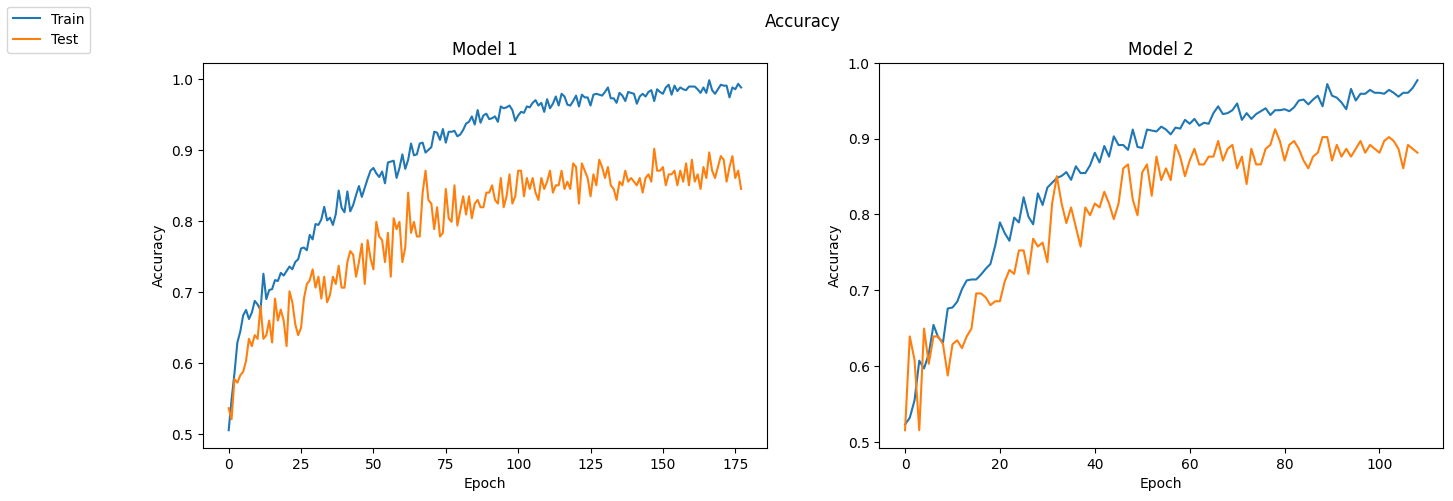

In [76]:
h = [history_cnn3, history_cnn4]
fig, axs = plt.subplots(1,2, sharey = False, figsize = (16,5))
fig.suptitle('Accuracy')
for i in range(2):
  axs[i].plot(h[i].history['accuracy'])
  axs[i].plot(h[i].history['val_accuracy'])
  axs[i].set_title("Model {}".format(i + 1))

for ax in axs.flat:
    ax.set(xlabel = 'Epoch', ylabel = 'Accuracy')

fig.legend(labels = ['Train','Test'], loc = "upper left")
plt.show()

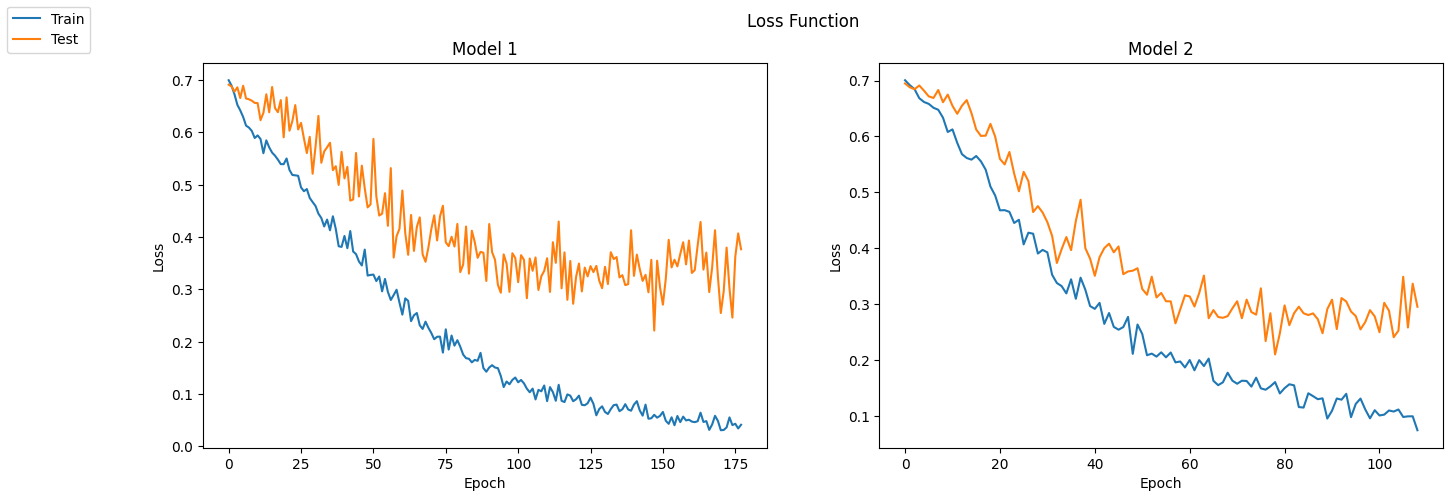

In [77]:
h = [history_cnn3, history_cnn4]
fig, axs = plt.subplots(1,2, sharey=False, figsize = (16,5))
fig.suptitle('Loss Function')
for i in range(2):
  axs[i].plot(h[i].history['loss'])
  axs[i].plot(h[i].history['val_loss'])
  axs[i].set_title("Model {}".format(i + 1))

for ax in axs.flat:
    ax.set(xlabel = 'Epoch', ylabel = 'Loss')

fig.legend(labels = ['Train','Test'], loc = "upper left")
plt.show()

## ANN Model

### Building the ANN Model

In [78]:
ann = tf.keras.models.Sequential()

#Input Layer
ann.add(tf.keras.layers.Dense(units = 256,activation = 'relu'))

#Hidden Layer
ann.add(tf.keras.layers.Dense(units = 128,activation = 'relu'))

#Output Layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#Compiling 
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN Model

In [79]:
# Using unscaled PCs for ANN
history_ann = ann.fit(Z_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2, shuffle = False)

Epoch 1/50
20/20 [==============================] - 1s 9ms/step - loss: 0.2959 - accuracy: 0.8752 - val_loss: 0.0409 - val_accuracy: 1.0000
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 8.2496e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 6.7243e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 8/50
2

### Evaluate ANN Model Accuracy

In [80]:
# Evaluate the Model using Test Set
y_pred = ann.predict(Z_test)

7/7 [==============================] - 0s 2ms/step


In [81]:
# Evaluate the Model using Train Set
_, accuracy = ann.evaluate(Z_train,y_train)
print('The ANN Model Accuracy is: %.2f %%' % (accuracy*100))

25/25 [==============================] - 0s 2ms/step - loss: 7.0753e-05 - accuracy: 1.0000
The ANN Model Accuracy is: 100.00 %


In [82]:
# Evaluate the Model using Test Set
_, accuracy = ann.evaluate(Z_test,y_test)
print('The ANN Model Accuracy is: %.2f %%' % (accuracy*100))

7/7 [==============================] - 0s 1ms/step - loss: 5.0330e-05 - accuracy: 1.0000
The ANN Model Accuracy is: 100.00 %


#### Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = (y_pred > 0.5) # Change the predicted output values to binary (True or False)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The ANN Model Accuracy is = %.3f" %(accuracy_score(y_test, y_pred)*100), "%")

[[ 77   0]
 [  0 119]]
The ANN Model Accuracy is = 100.000 %


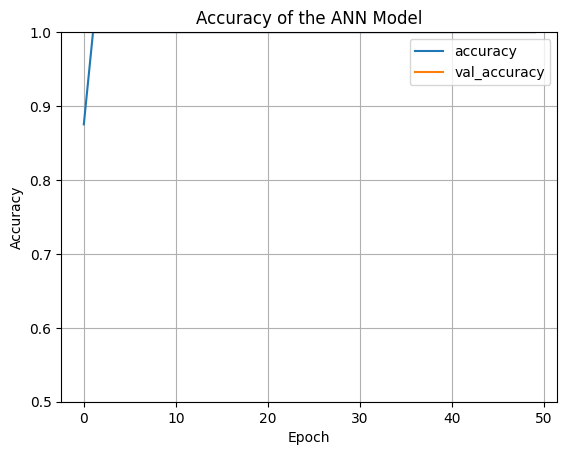

In [84]:
plt.plot(pd.DataFrame(history_ann.history['accuracy']), label = "accuracy")
plt.plot(pd.DataFrame(history_ann.history['val_accuracy']), label = "val_accuracy")

plt.rcParams['font.size'] = '10'

plt.plot(figsize = (8,5))

plt.title('Accuracy of the ANN Model')
plt.legend(loc = 'best')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.gca().set_ylim(0.5,1)
plt.show()

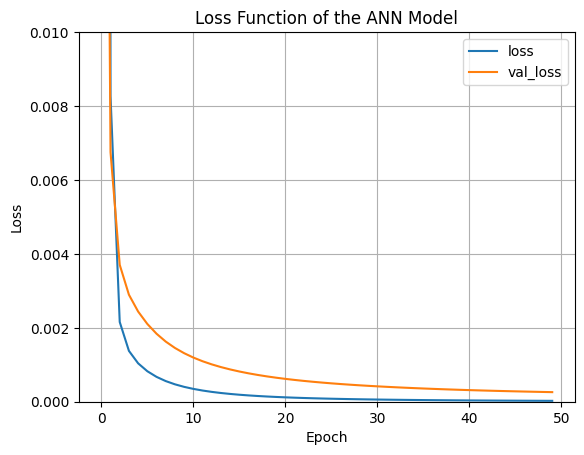

In [85]:
plt.plot(pd.DataFrame(history_ann.history['loss']), label = "loss")
plt.plot(pd.DataFrame(history_ann.history['val_loss']), label = "val_loss")

plt.rcParams['font.size'] = '10'

plt.plot(figsize = (8,5))

plt.title('Loss Function of the ANN Model')
plt.legend(loc = 'best')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.gca().set_ylim(0,0.01)
plt.show()

The above loss function plot shows that the ANN model is not overfitted as the loss function converges.

## Non-Linear SVM (Gaussian Kernel)

In [86]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
classifier = SVC(kernel = 'rbf', random_state = RandSt)
classifier.fit(Z_train, y_train)

SVC(random_state=42)

### Cross Validation Score (Nonlinear SVM)

In [87]:
scores = cross_val_score(classifier, Z_train, y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = %.3f' %np.average(scores*100), '%')

[0.99363057 1.         0.99358974 1.         1.        ]
Averaged prediction accuracy = 99.744 %


### Confusion Matrix & Accuracy (Nonlinear SVM)

In [88]:
y_test_pred_SVC = classifier.predict(Z_test)
cm = confusion_matrix(y_test, y_test_pred_SVC)
test_pred_SVC_score = accuracy_score(y_test, y_test_pred_SVC)
print(cm)
print('Average testing accuracy = %.3f' %(test_pred_SVC_score*100), '%')

[[ 77   0]
 [  0 119]]
Average testing accuracy = 100.000 %


## Naive Bayes Classifier

In [89]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(Z_train, y_train)

GaussianNB()

### Cross Validation Score (Naive Bayes Classifier)

In [90]:
scores = cross_val_score(nb_clf, Z_train, y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = %.3f' %np.average(scores*100), "%")

[0.84076433 0.87261146 0.82051282 0.8525641  0.85897436]
Averaged prediction accuracy = 84.909 %


### Confusion Matrix & Accuracy (Naive Bayes Classifier)

In [91]:
Y_test_pred_nb = nb_clf.predict(Z_test)
cm = confusion_matrix(y_test, Y_test_pred_nb)
print(cm)
print('Average testing accuracy = %.3f' %(accuracy_score(y_test, Y_test_pred_nb)*100), "%")

[[72  5]
 [34 85]]
Average testing accuracy = 80.102 %


From the above confusion matrix, it is noted that there are 34 False Negatives out of 119 Good Song data, which shows that NB classifier is not effective in identifying "good" songs.

# Future Work: Transfer Learning Models

Transfore Learning Models such as VGG16 can be used for small dataset. The VGG16 pre-trained model contains total 16 layers in which weights and bias parameters are learnt. The following codes has been built for future work. The model built has an accuracy of 50% only, more work has to be done to refine the model.

## Generating Features for Transfer Learning Models

Note that the images are upscaled to 224x224 for VGG16 model.

In [92]:

imgs_train1 = imageGenerator.flow_from_directory(genimgsPath,
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                subset="training",        #creates training subset
                                                class_mode='categorical',
                                                shuffle=True,
                                                color_mode="rgb")

imgs_test1 = imageGenerator.flow_from_directory(genimgsPath,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               subset="validation",       #creates test subset
                                               class_mode='categorical',
                                               shuffle=True,
                                               color_mode="rgb")
print(imgs_test1.class_indices)


Found 784 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
{'Bad': 0, 'Good': 1}


## Transfer Learning - CNN Architectures: VGG16

In [93]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras import layers




In [94]:

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import Sequential


In [95]:

IMG_SIZE = (224,224)

vgg16_weight_path = 'imagenet'
vgg = VGG16(
    weights=vgg16_weight_path,
    include_top=False, 
    input_shape=IMG_SIZE + (3,)
)


In [96]:

NUM_CLASSES = 1

vgg16 = Sequential()
vgg16.add(vgg)
vgg16.add(layers.Dropout(0.3))
vgg16.add(layers.Flatten())
vgg16.add(layers.Dropout(0.5))
vgg16.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

vgg16.layers[0].trainable = False

vgg16.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

vgg16.compile(loss='binary_crossentropy', optimizer='Adam', metrics=["accuracy"])

vgg16.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_5 (Dropout)         (None, 25088)             0         
                                                                 
 dense_11 (Dense)            (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [97]:

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3, restore_best_weights = True)

vgg16_history = vgg16.fit(
    imgs_train1,
    epochs = 20, # Tried using different number of epoch but there is no improvement on the accuracy
    callbacks = es,
    validation_data=imgs_test1
)


Epoch 1/20
25/25 [==============================] - 230s 9s/step - loss: 0.8496 - accuracy: 0.5000 - val_loss: 0.7299 - val_accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - 215s 9s/step - loss: 0.7554 - accuracy: 0.5000 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 3/20
25/25 [==============================] - 209s 8s/step - loss: 0.7262 - accuracy: 0.5000 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 4/20
25/25 [==============================] - 207s 8s/step - loss: 0.7216 - accuracy: 0.5000 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 5/20
25/25 [==============================] - 205s 8s/step - loss: 0.7119 - accuracy: 0.5000 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 6/20
25/25 [==============================] - 209s 9s/step - loss: 0.7094 - accuracy: 0.5000 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 7/20
25/25 [==============================] - 206s 8s/step - loss: 0.7090 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 8/20
25

# Conclusion

This project focuses on examining the ERP related to different genres of music. Using a MUSE 2 EEG headband, a series of real-time brainwave data is collected from all group members, as well as external participants. We then employ the method proposed by Jordan J. Bird to pre-process the raw EEG data and create a dataset which would yield meaningful results in our machine learning models. Using the processed data, we train multiple machine learning models, and employ neural networks, in order to classify whether someone is listening to a “good” or “bad” song, based on their brainwave response. 

In order to ensure our dataset is prepared for building our model, the collected data is pre-processed prior to training and testing. The pre-processing stage includes elimination of null values and unreasonable data, feature generation, splitting into training (80%) and testing (20%) sets, and feature scaling. After this step is completed, principal component analysis is performed to generate the top 256 PCs for feeding into the ANN, SVM and NB classifiers. These 256 PCs are scaled to produce grayscale images to pass into the CNN model.

<font size="3"> __Results of the Machine Learning Models__ </font>

|       Models      |  Accuracy on Training Set  |  Accuracy on Test Set  |
|:-----------------:|:--------------------------:|:----------------------:|
|        ANN        |            100%            |          100%          |
|    CNN Model 1    |           99.23%           |         87.63%         |
|    CNN Model 2    |           97.70%           |         87.63%         |
|  Non-linear SVM   |           99.74%           |          100%          |
|    Naive-Bayes    |           84.91%           |         80.10%         |

Employing a non-linear SVM model to train our machine learning model and building an ANN model of the pre-processed data yields an accuracy of 100% on the test set without overfitting. This accuracy is impossibly high, and we identify a limited amount of data points, as well as bias within subject selection and extremity of classifications as possible causes for this.

We also train our data via a Naive-Bayes classifier, which yields an accuracy of 84.91% on the training set, and 80.10% on the test set. We use two CNN models to analyze the EEG data, which is pre-processed via Jordan J. Bird’s method, in place of ANN. Early stopping was used to prevent the model from overfitting. The first CNN model yields a training accuracy of 99.23% and a test set accuracy of 87.63%. The second CNN model follows the architecture in Jordan J. Bird’s research, and is able to achieve an accuracy of 97.70% on the training set and an accuracy of 87.63% on the test set.

From the confusion matrix of Naive-Bayes classifier, we can conclude that it is weak at identifying "good" songs, given that there are 34 False Negatives out of 119 data. Although the CNN methods did not yield a 100% accuracy, as non-linear SVM and ANN did, we conclude that it may still be relatively effective classifiers of “good” and “bad” songs as compared to the Naive-Bayes classifier. All of the models may be improved with further development of the Muse 2 headband feature extraction method.

In order to expand on this project, we propose the use of transfer learning models, such as the pre-trained VGG16 model, which would re-evaluate the weights and bias parameters of our model, making it more accurate. By employing transfer learning models we could reduce, or even eliminate, the small dataset bias we were seeing in our results.

Regardless of the possible improvements discussed above, we argue that the proposed machine learning algorithm has given a competitive approach for brainwave data classification on music preference through ANN, CNN and SVM.

In the future, we believe that our project can be expanded for use in music therapy, or music industry market analysis, to gain further insight into how people evaluate and respond to musical, auditory, or stimuli.